# 0.0 Imports

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

warnings.filterwarnings( 'ignore' )

# 0.1 Load Data

In [2]:
df_raw = pd.read_csv('datasets/df_ready.csv')

In [3]:
df_raw = df_raw.drop(columns=['Unnamed: 0', 'Date_imp', 'Cluster', 'condition','currency', 'imageURLs','shipping', 'sourceURLs', 'weight', 'Date_imp_d.1','Zscore_1','price_std'])

In [4]:
df_raw.head(1)

,Date_imp_d,Category_name,name,price,disc_price,merchant,Disc_percentage,isSale,Imp_count,brand,p_description,dateAdded,dateSeen,dateUpdated,manufacturer,Day_n,month,month_n,day,Week_Number
0,2017/12/14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.0,64.99,Walmart.com,0.06,Yes,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-12-14T06:00:00Z,2018-06-13T19:39:02Z,Boytone,Thursday,12,December,14,50


# 0.2 Rename Columns

In [5]:
df_raw.columns = ['date_imp', 'category_name', 'name', 'price', 'disc_price',
       'merchant', 'disc_percentage', 'is_sale', 'imp_count', 'brand',
       'p_description', 'date_added', 'date_seen', 'date_updated', 'manufacturer',
       'day_n', 'month', 'month_n', 'day', 'week_number']

# 1.0 Descrição dos Dados

In [6]:
df1 = df_raw.copy()

## 1.1 Data Dimension

In [7]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 23151
Number of columns: 20


## 1.2 Data Dtypes

In [8]:
df1.dtypes

date_imp            object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
date_added          object
date_seen           object
date_updated        object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

## 1.3 Check NA

In [9]:
df1.isna().sum()
#Não tem muito NA nas colunas que iremos usar

date_imp               0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
date_added             0
date_seen              0
date_updated           0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

## 1.4 Change Data Dtypes

In [10]:
df1['date_imp'] = pd.to_datetime(df1['date_imp'])

## 1.5 Descriptive Statistics

In [11]:
num_att = df1.select_dtypes(include = ['float64','int64'])
cat_att = df1.select_dtypes(exclude = ['float64','int64','datetime64[ns]'])

## 1.5.1 Numerical attributes

In [12]:
#central tendency
ct1 = pd.DataFrame(num_att.apply(np.mean)).T #média
ct2 = pd.DataFrame(num_att.apply(np.median)).T #mediana

#dispersion
d1 = pd.DataFrame(num_att.apply(np.std)).T #desvio padrão
d2 = pd.DataFrame(num_att.apply(np.min)).T #min
d3 = pd.DataFrame(num_att.apply(np.max)).T #max
d4 = pd.DataFrame(num_att.apply(lambda x: x.max() - x.min())).T #range
d5 = pd.DataFrame(num_att.apply(lambda x: x.skew())).T #skew
d6 = pd.DataFrame(num_att.apply(lambda x: x.kurtosis())).T #kurtosis

m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['att','min','max','range','mean','median','std','skew','kurtosis']
m

,att,min,max,range,mean,median,std,skew,kurtosis
0,price,1.0,10879.95,10878.95,513.037803,199.99,859.091448,4.595160,34.411146
1,disc_price,1.0,10879.95,10878.95,494.104295,199.00,808.571509,4.748349,39.612839
2,disc_percentage,0.0,0.80,0.80,0.016933,0.00,0.077847,5.217632,28.754920
3,imp_count,1.0,31.00,30.00,6.560926,5.00,5.403049,1.286351,1.639569
4,month,1.0,12.00,11.00,7.651030,8.00,2.592787,-0.099417,-0.628859
5,day,1.0,31.00,30.00,15.693879,16.00,9.681413,0.032258,-1.331838
6,week_number,1.0,51.00,50.00,31.342750,32.00,11.316253,-0.266980,-0.648027


# 2.0 EDA

In [13]:
df2 = df1.copy()

In [14]:
df2.columns

Index(['date_imp', 'category_name', 'name', 'price', 'disc_price', 'merchant',
       'disc_percentage', 'is_sale', 'imp_count', 'brand', 'p_description',
       'date_added', 'date_seen', 'date_updated', 'manufacturer', 'day_n',
       'month', 'month_n', 'day', 'week_number'],
      dtype='object')

## 2.1 Qual merchant mais vendeu?

,merchant,date_imp
1,Bestbuy.com,11287
4,bhphotovideo.com,5064
2,Walmart.com,3947
5,ebay.com,2809
0,Amazon.com,25
6,kmart.com,17
3,barcodable.com,2


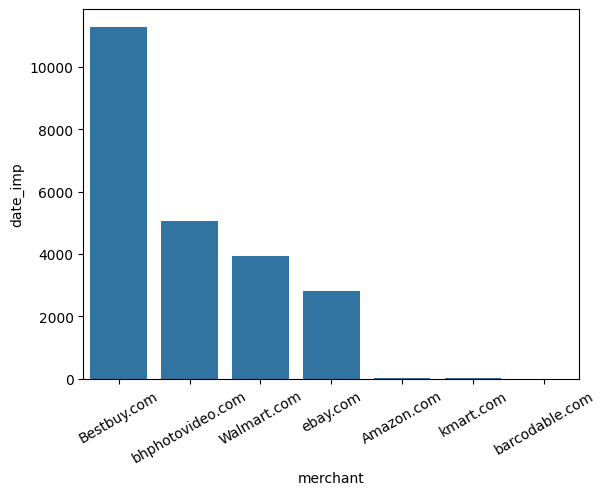

In [15]:
aux1 = df2[['date_imp','merchant']].groupby('merchant').count().reset_index().sort_values(by='date_imp',ascending=False)
plt.xticks(rotation=30)
sns.barplot(x='merchant', y='date_imp',data=aux1);
aux1

In [16]:
#seleção de lojas
df_best = df2.loc[df2['merchant'] == 'Bestbuy.com',:]
df_bhp = df2.loc[df2['merchant'] == 'bhphotovideo.com',:]
df_walmart = df2.loc[df2['merchant'] == 'Walmart.com',:]
df_ebay = df2.loc[df2['merchant'] == 'ebay.com',:]

## 2.2 Qual a categoria mais vendida?

### 2.2.1 Categorias mais vendidas no geral

,category_name,date_imp
57,"tv, television, video",2130
27,"laptop, computer",1715
50,"speaker, portable, bluetooth",1104
5,"camera, mirrorless, photo",1072
9,"car, speaker, subwoofer",865


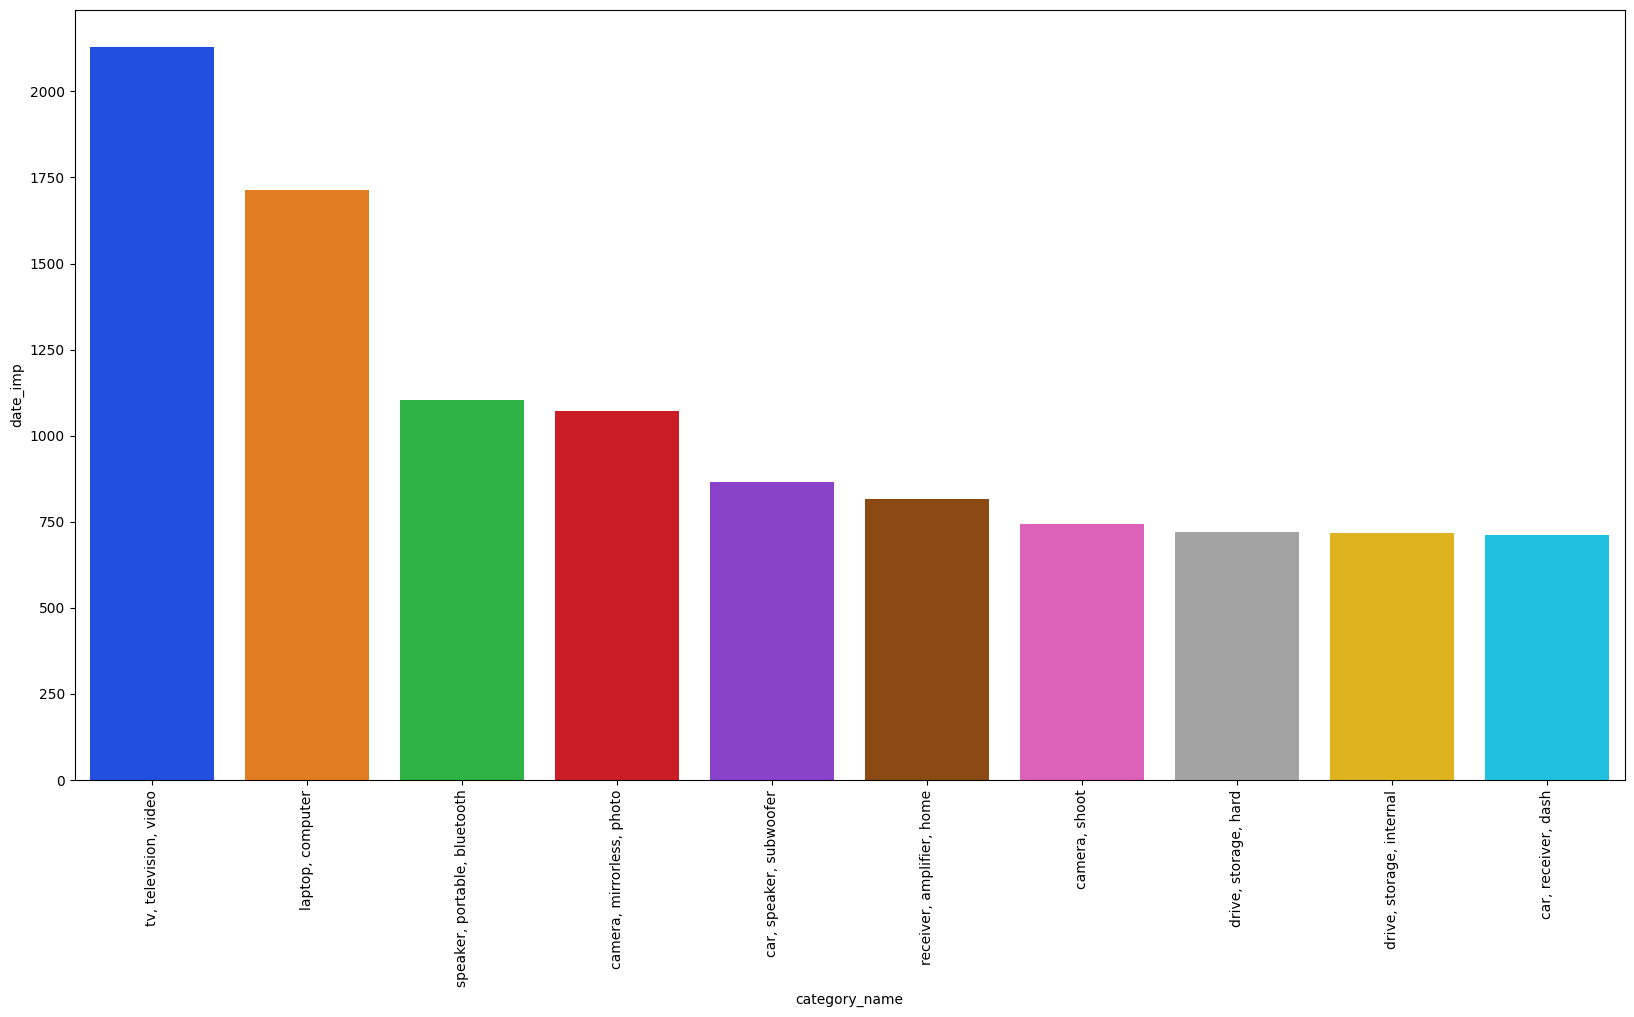

In [17]:
aux2 = df2[['date_imp','category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x='category_name', y='date_imp',data=aux2.head(10),palette='bright');
plt.xticks(rotation=90);

aux2.head()

### 2.2.2 Categorias mais vendidas por loja

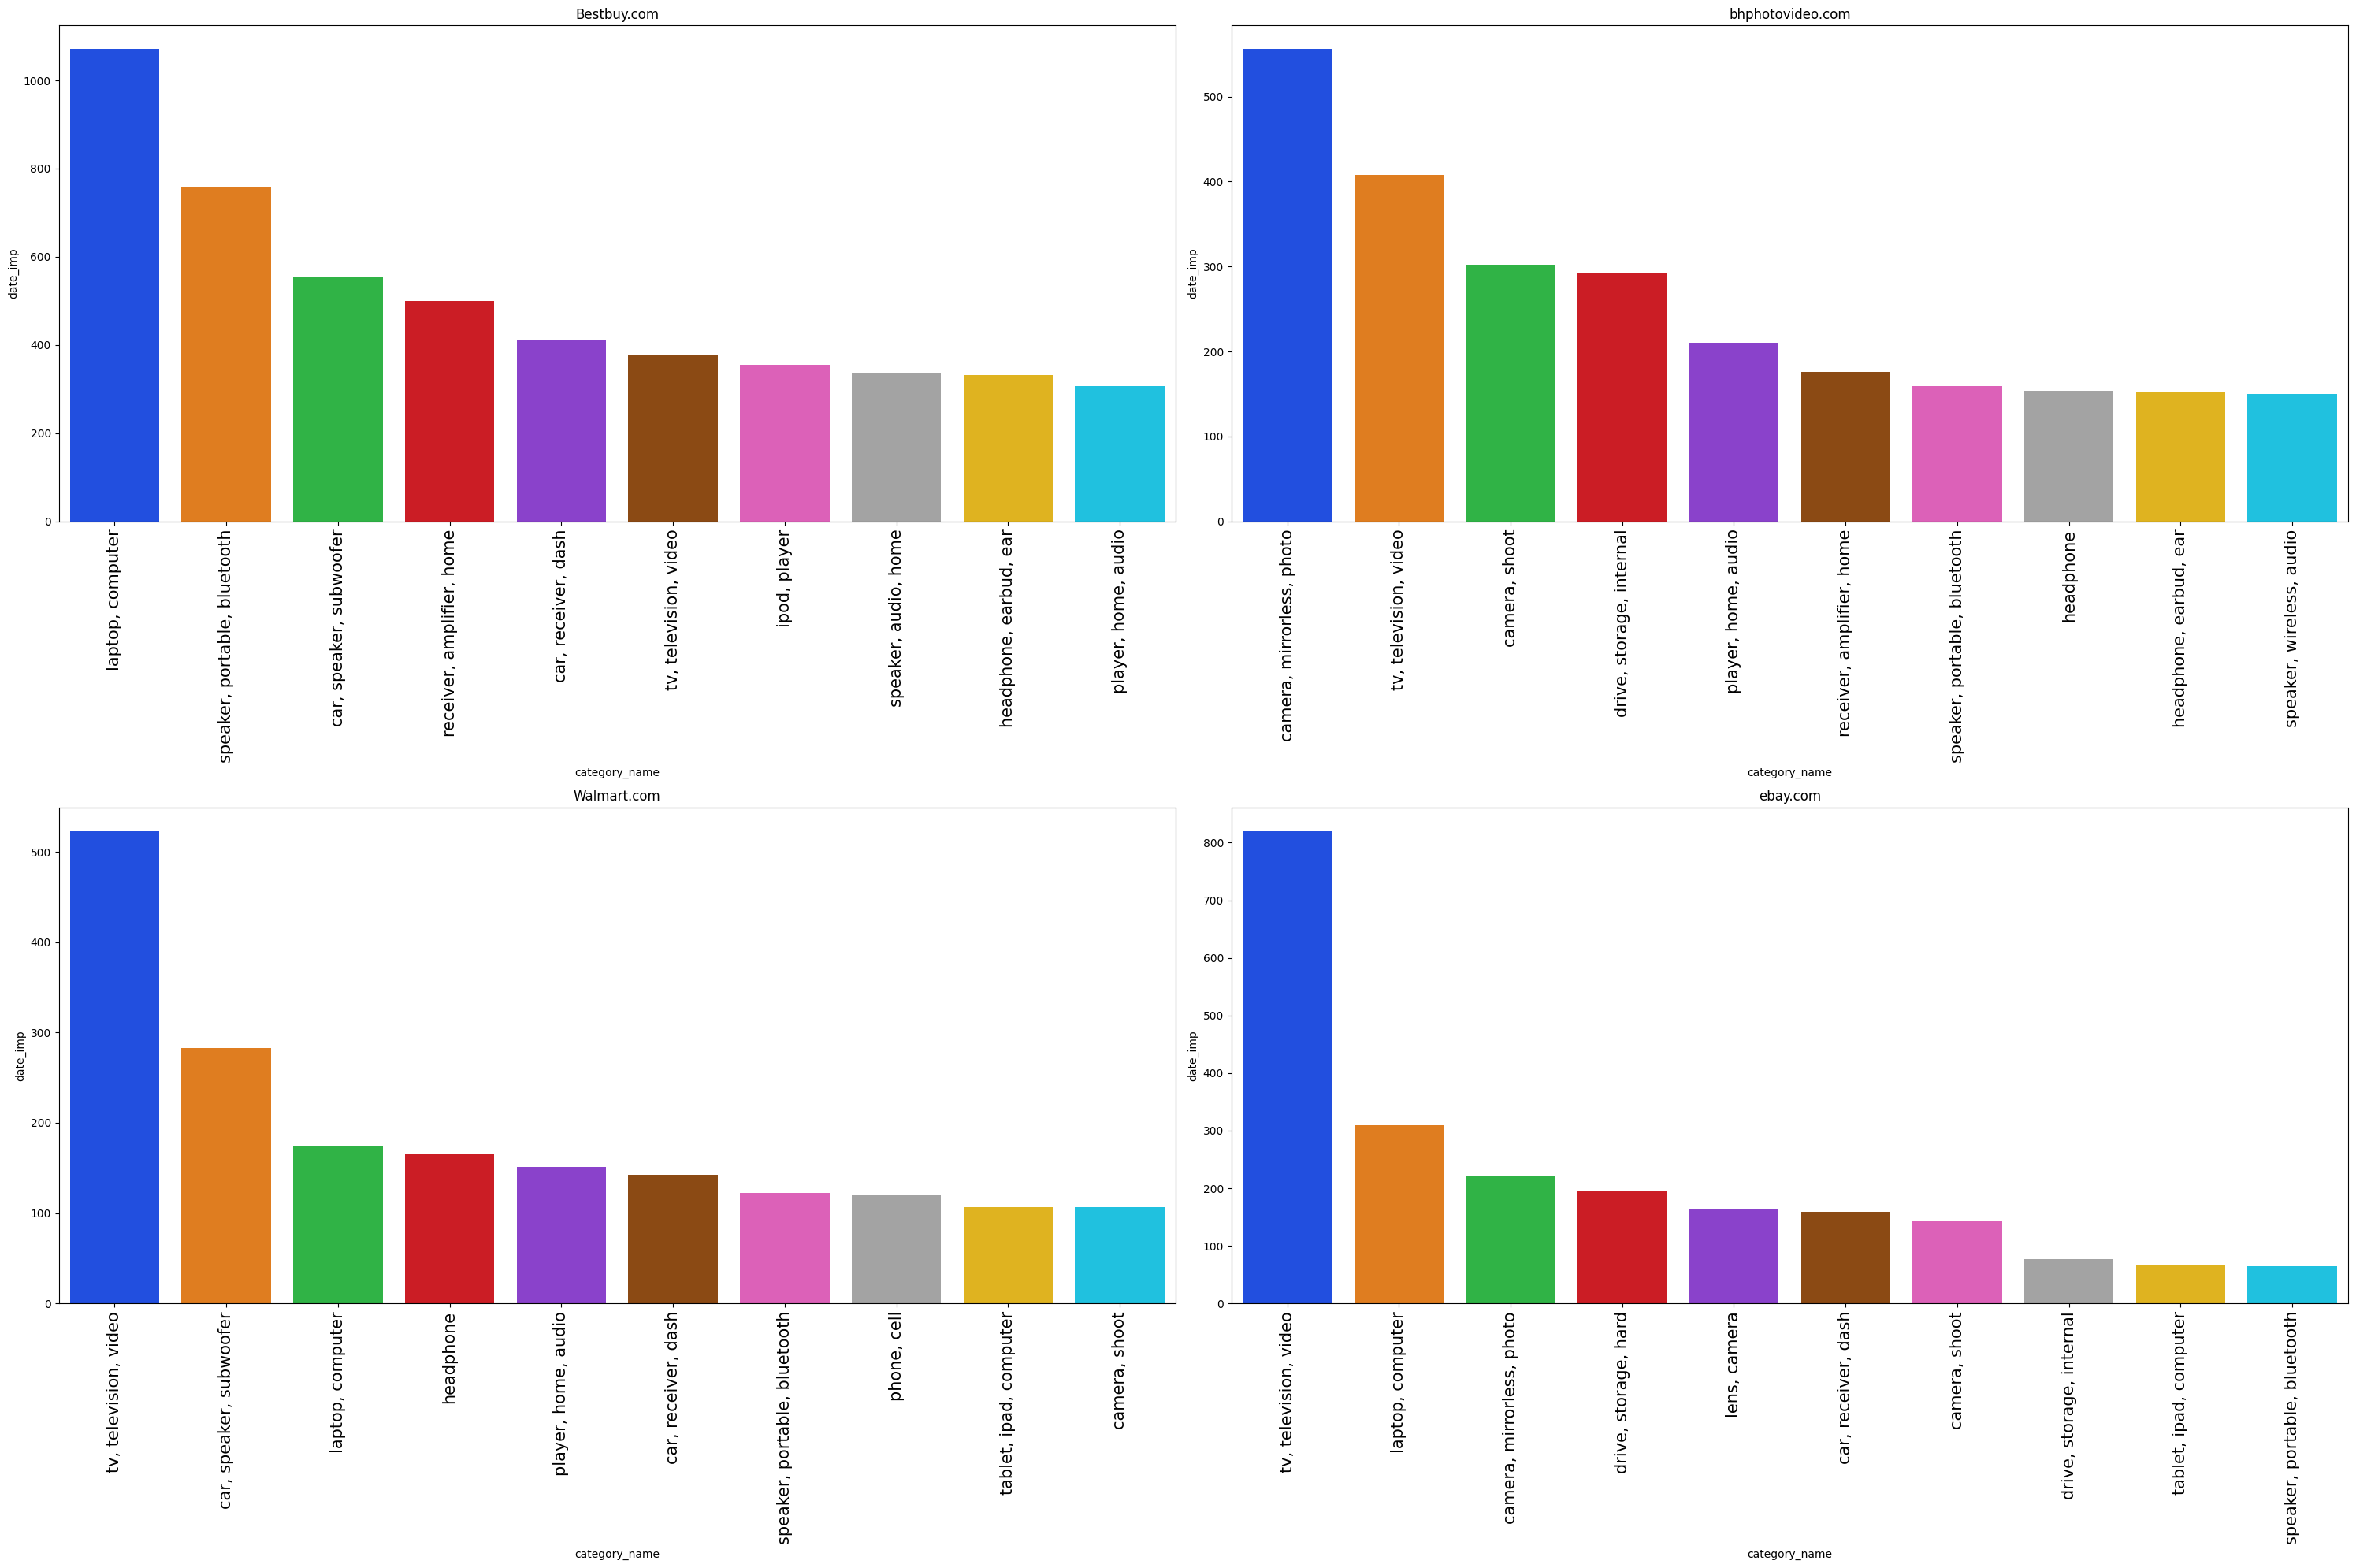

In [18]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
aux3 = df_best[['date_imp','category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='category_name', y='date_imp',data=aux3.head(10),palette='bright');
plt.title('Bestbuy.com');
plt.xticks(rotation=90,fontsize=15);

plt.subplot(2,2,2)
aux4 = df_bhp[['date_imp','category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='category_name', y='date_imp',data=aux4.head(10),palette='bright');
plt.title('bhphotovideo.com');
plt.xticks(rotation=90,fontsize=15);

plt.subplot(2,2,3)
aux5 = df_walmart[['date_imp','category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='category_name', y='date_imp',data=aux5.head(10),palette='bright');
plt.title('Walmart.com');
plt.xticks(rotation=90,fontsize=15);

plt.subplot(2,2,4)
aux6 = df_ebay[['date_imp','category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='category_name', y='date_imp',data=aux6.head(10),palette='bright');
plt.title('ebay.com');
plt.xticks(rotation=90,fontsize=15);

plt.tight_layout();

## 2.3 Qual marca mais vendida?

### 2.3.1 Marcas mais vendidas no geral

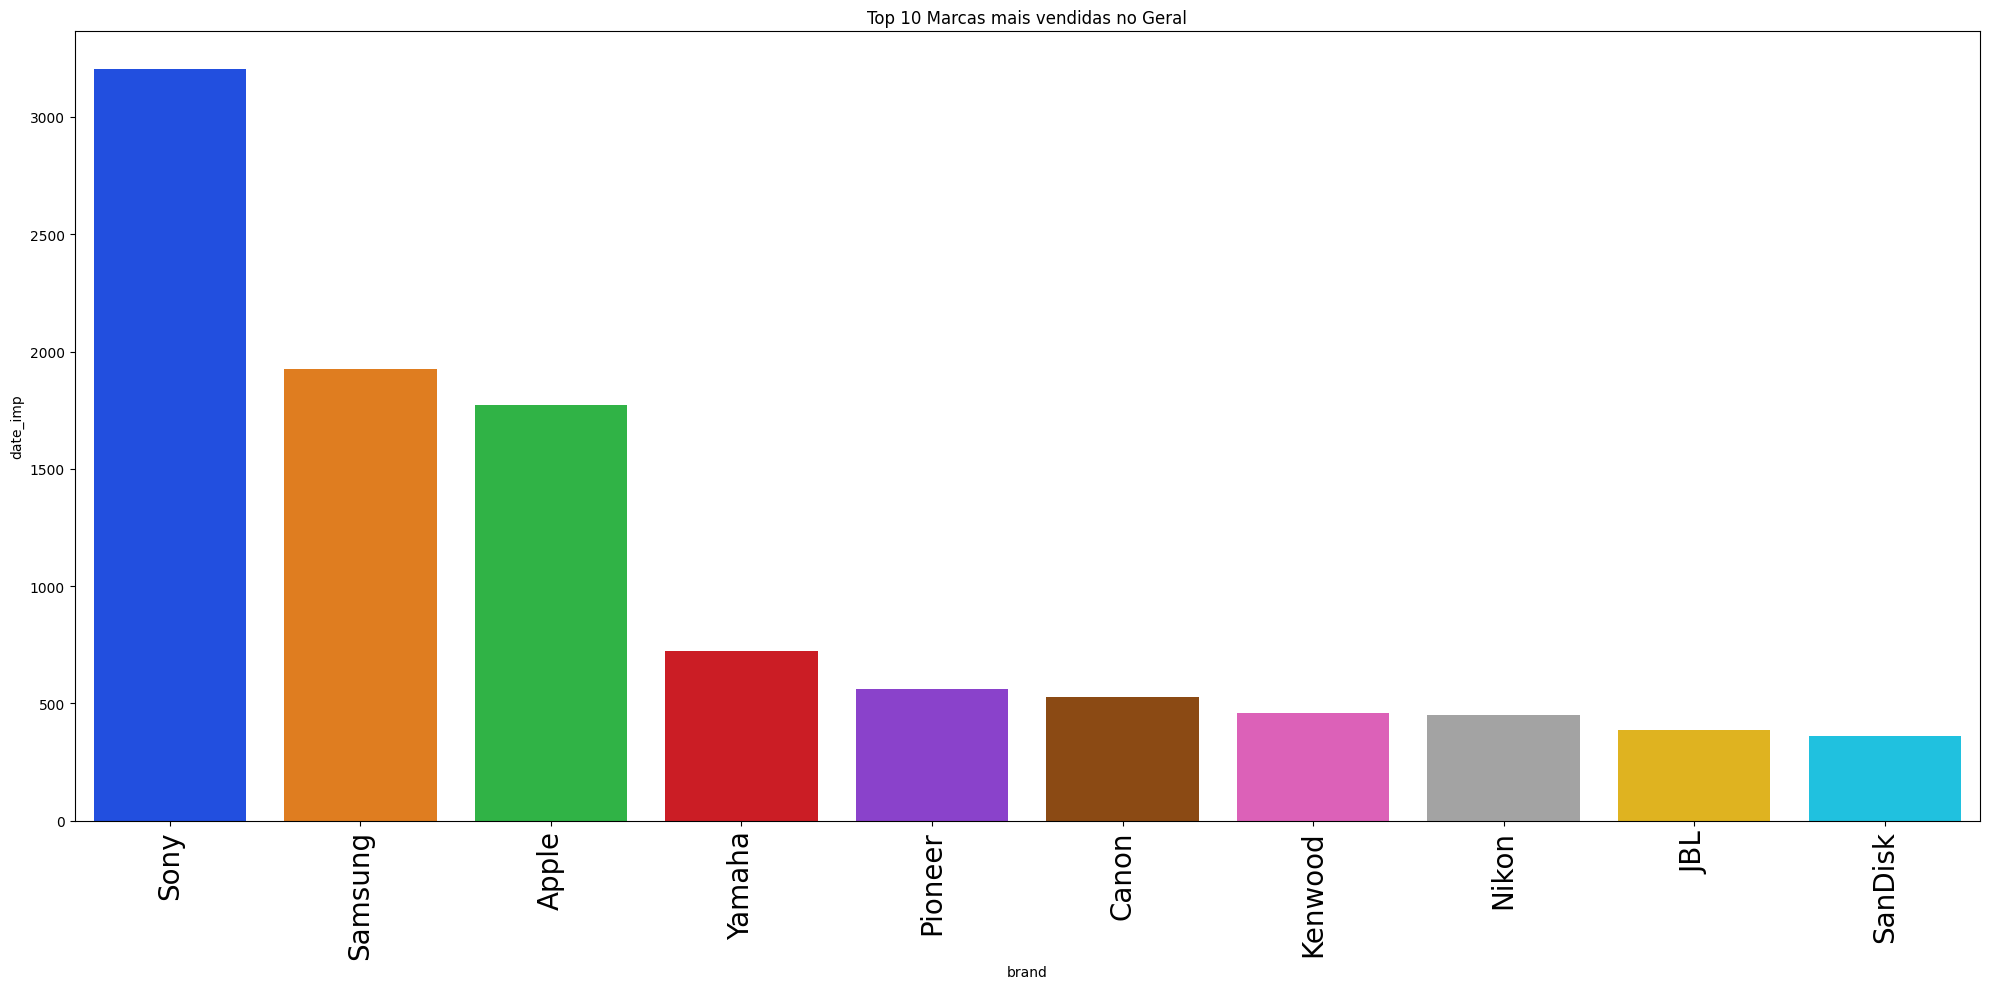

In [19]:
aux7 = df2[['date_imp','brand']].groupby('brand').count().reset_index().sort_values(by='date_imp',ascending=False)
plt.figure(figsize=(20,10))
plt.title('Top 10 Marcas mais vendidas no Geral');
sns.barplot(x='brand', y='date_imp',data=aux7.head(10),palette='bright');
plt.xticks(rotation=90,fontsize=20);

plt.tight_layout();

### 2.3.1 Marcas mais vendidas por loja

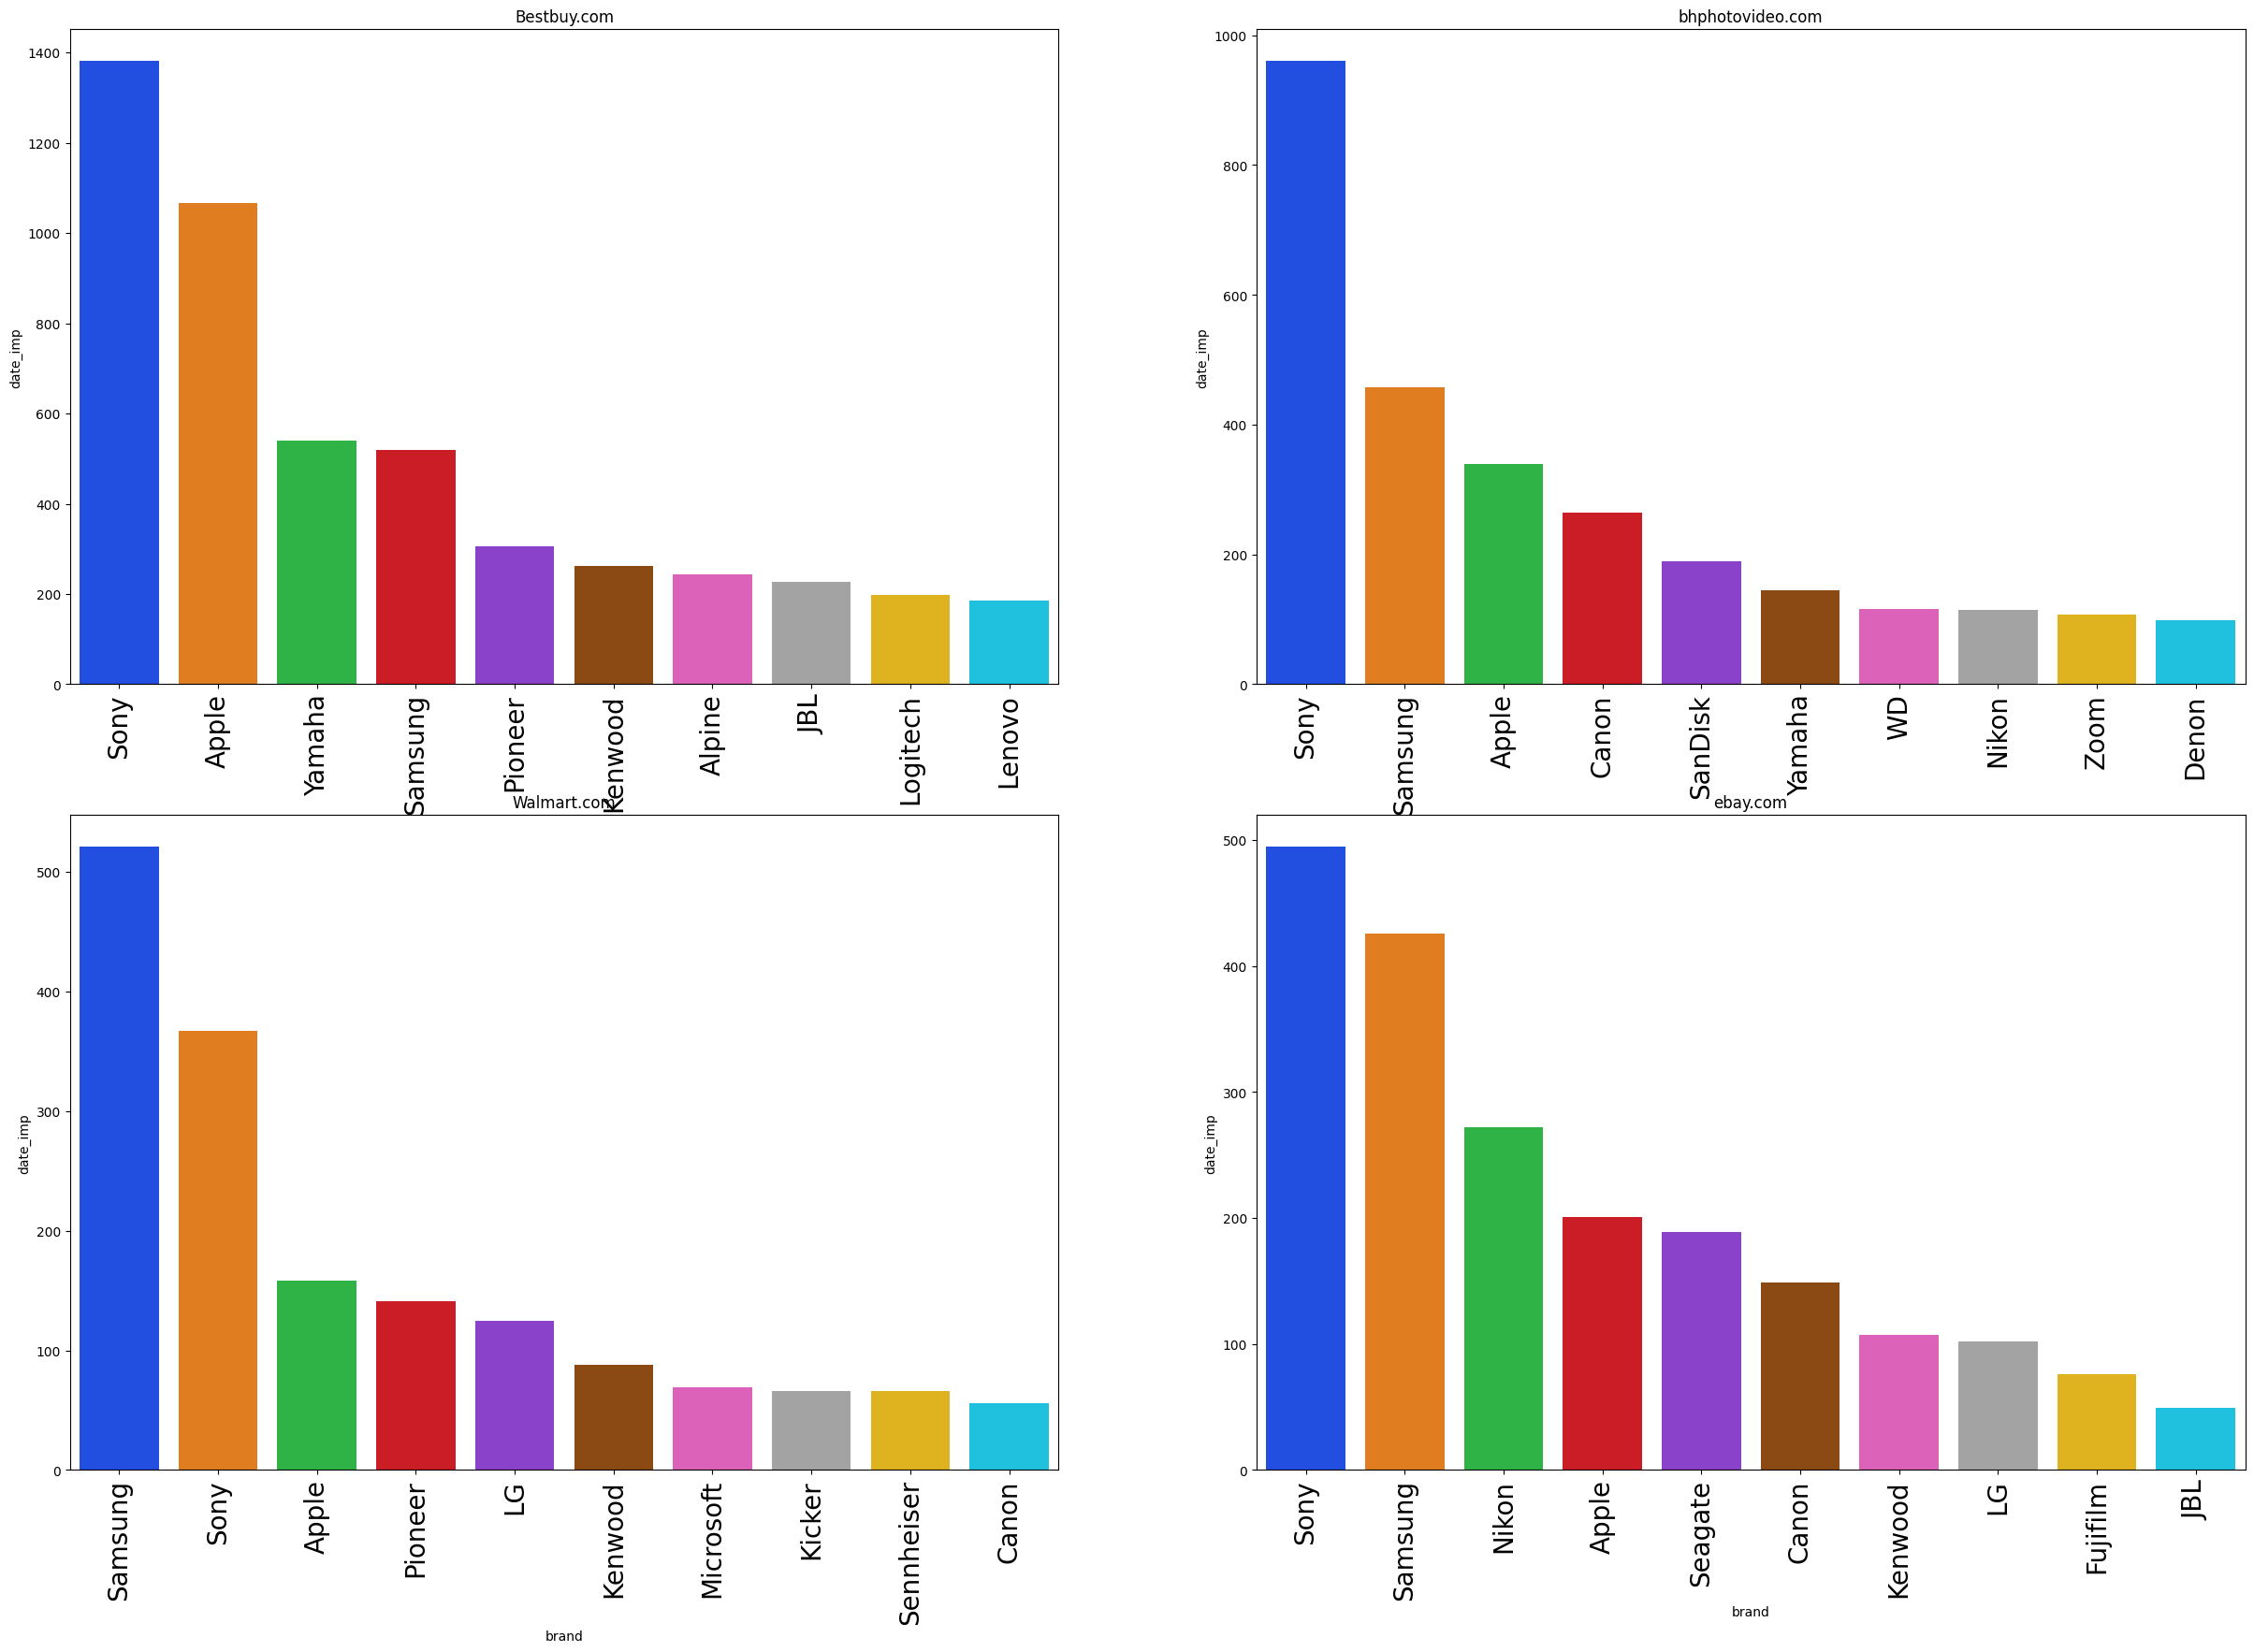

In [20]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
aux12 = df_best[['date_imp','brand']].groupby('brand').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='brand', y='date_imp',data=aux12.head(10),palette='bright');
plt.title('Bestbuy.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,2)
aux8 = df_bhp[['date_imp','brand']].groupby('brand').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='brand', y='date_imp',data=aux8.head(10),palette='bright');
plt.title('bhphotovideo.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,3)
aux9 = df_walmart[['date_imp','brand']].groupby('brand').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='brand', y='date_imp',data=aux9.head(10),palette='bright');
plt.title('Walmart.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,4)
aux10 = df_ebay[['date_imp','brand']].groupby('brand').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='brand', y='date_imp',data=aux10.head(10),palette='bright');
plt.title('ebay.com');
plt.xticks(rotation=90,fontsize=20);

## 2.4 Quais os dias que mais vendem?

### 2.4.1 Quais os dias que mais vendem no geral?

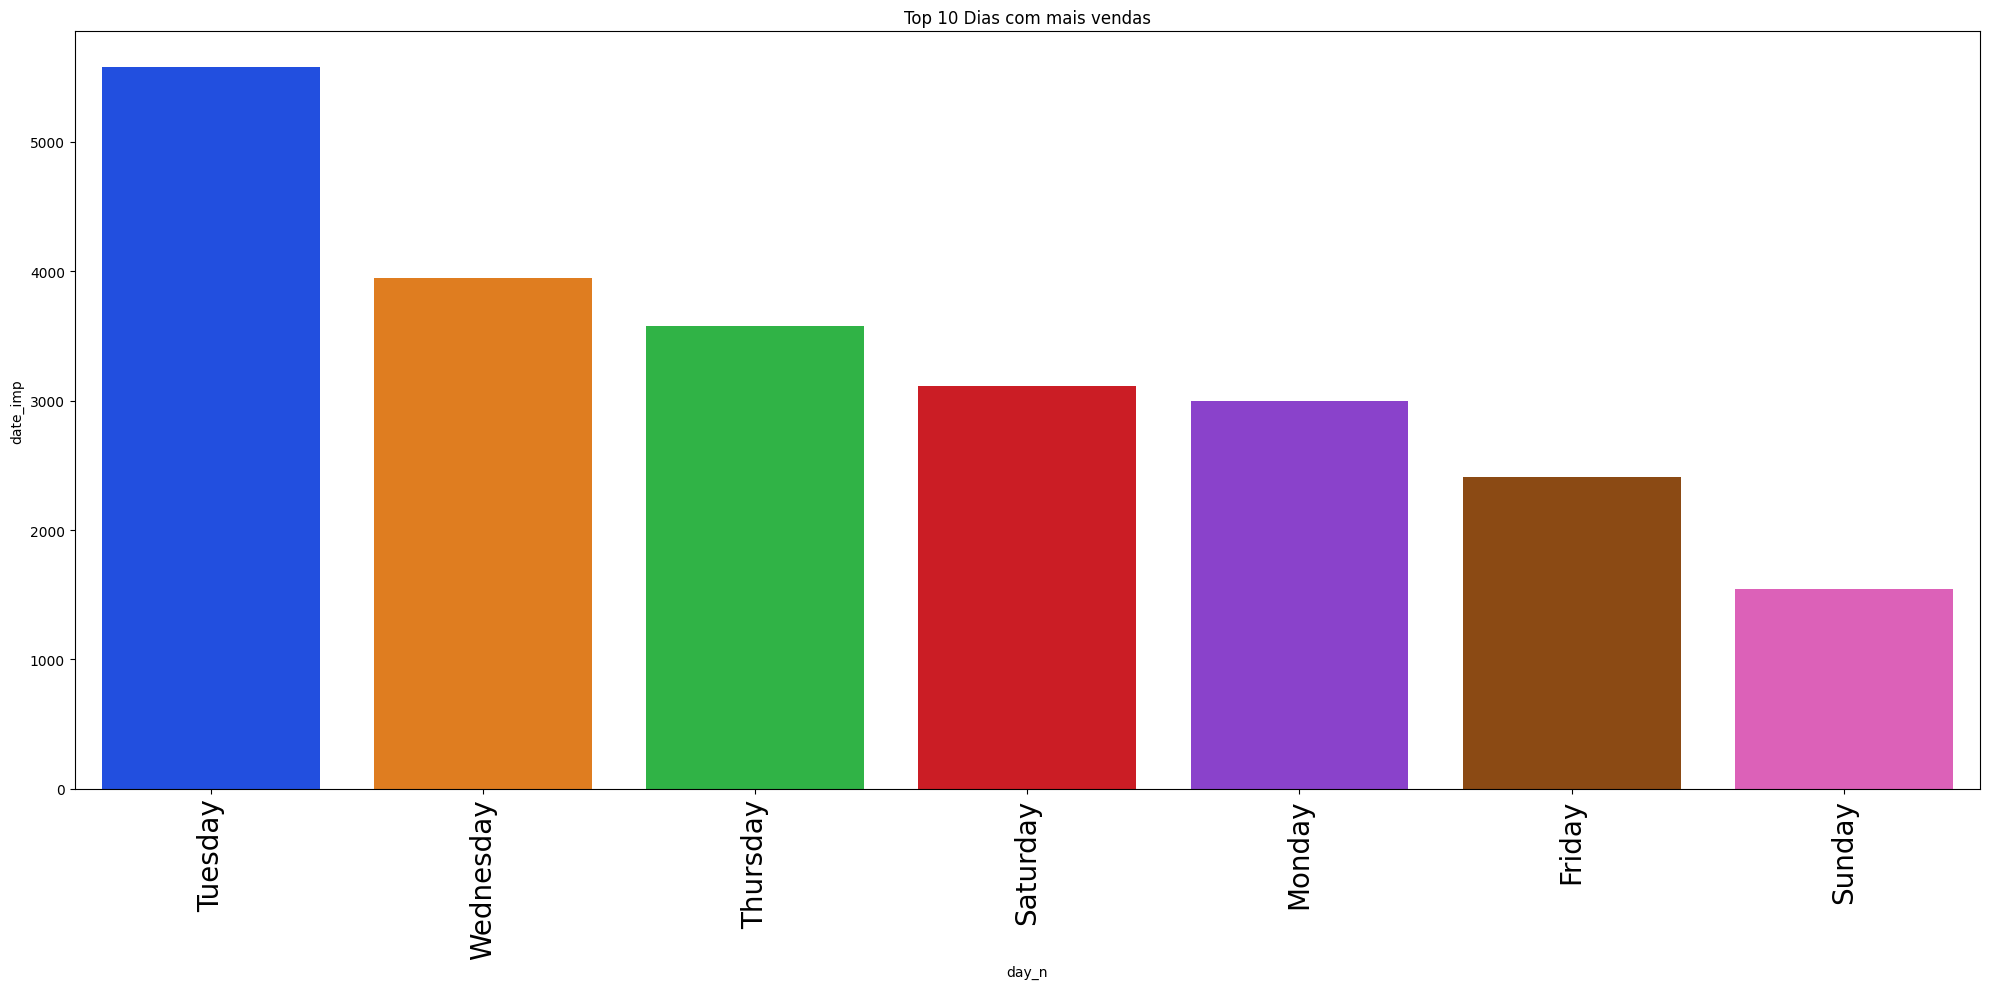

In [21]:
aux13 = df2[['date_imp','day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp',ascending=False)
plt.figure(figsize=(20,10))
plt.title('Top 10 Dias com mais vendas');
sns.barplot(x='day_n', y='date_imp',data=aux13,palette='bright');
plt.xticks(rotation=90,fontsize=20);

plt.tight_layout();

### 2.4.2 Quais os dias que mais vendem por loja?

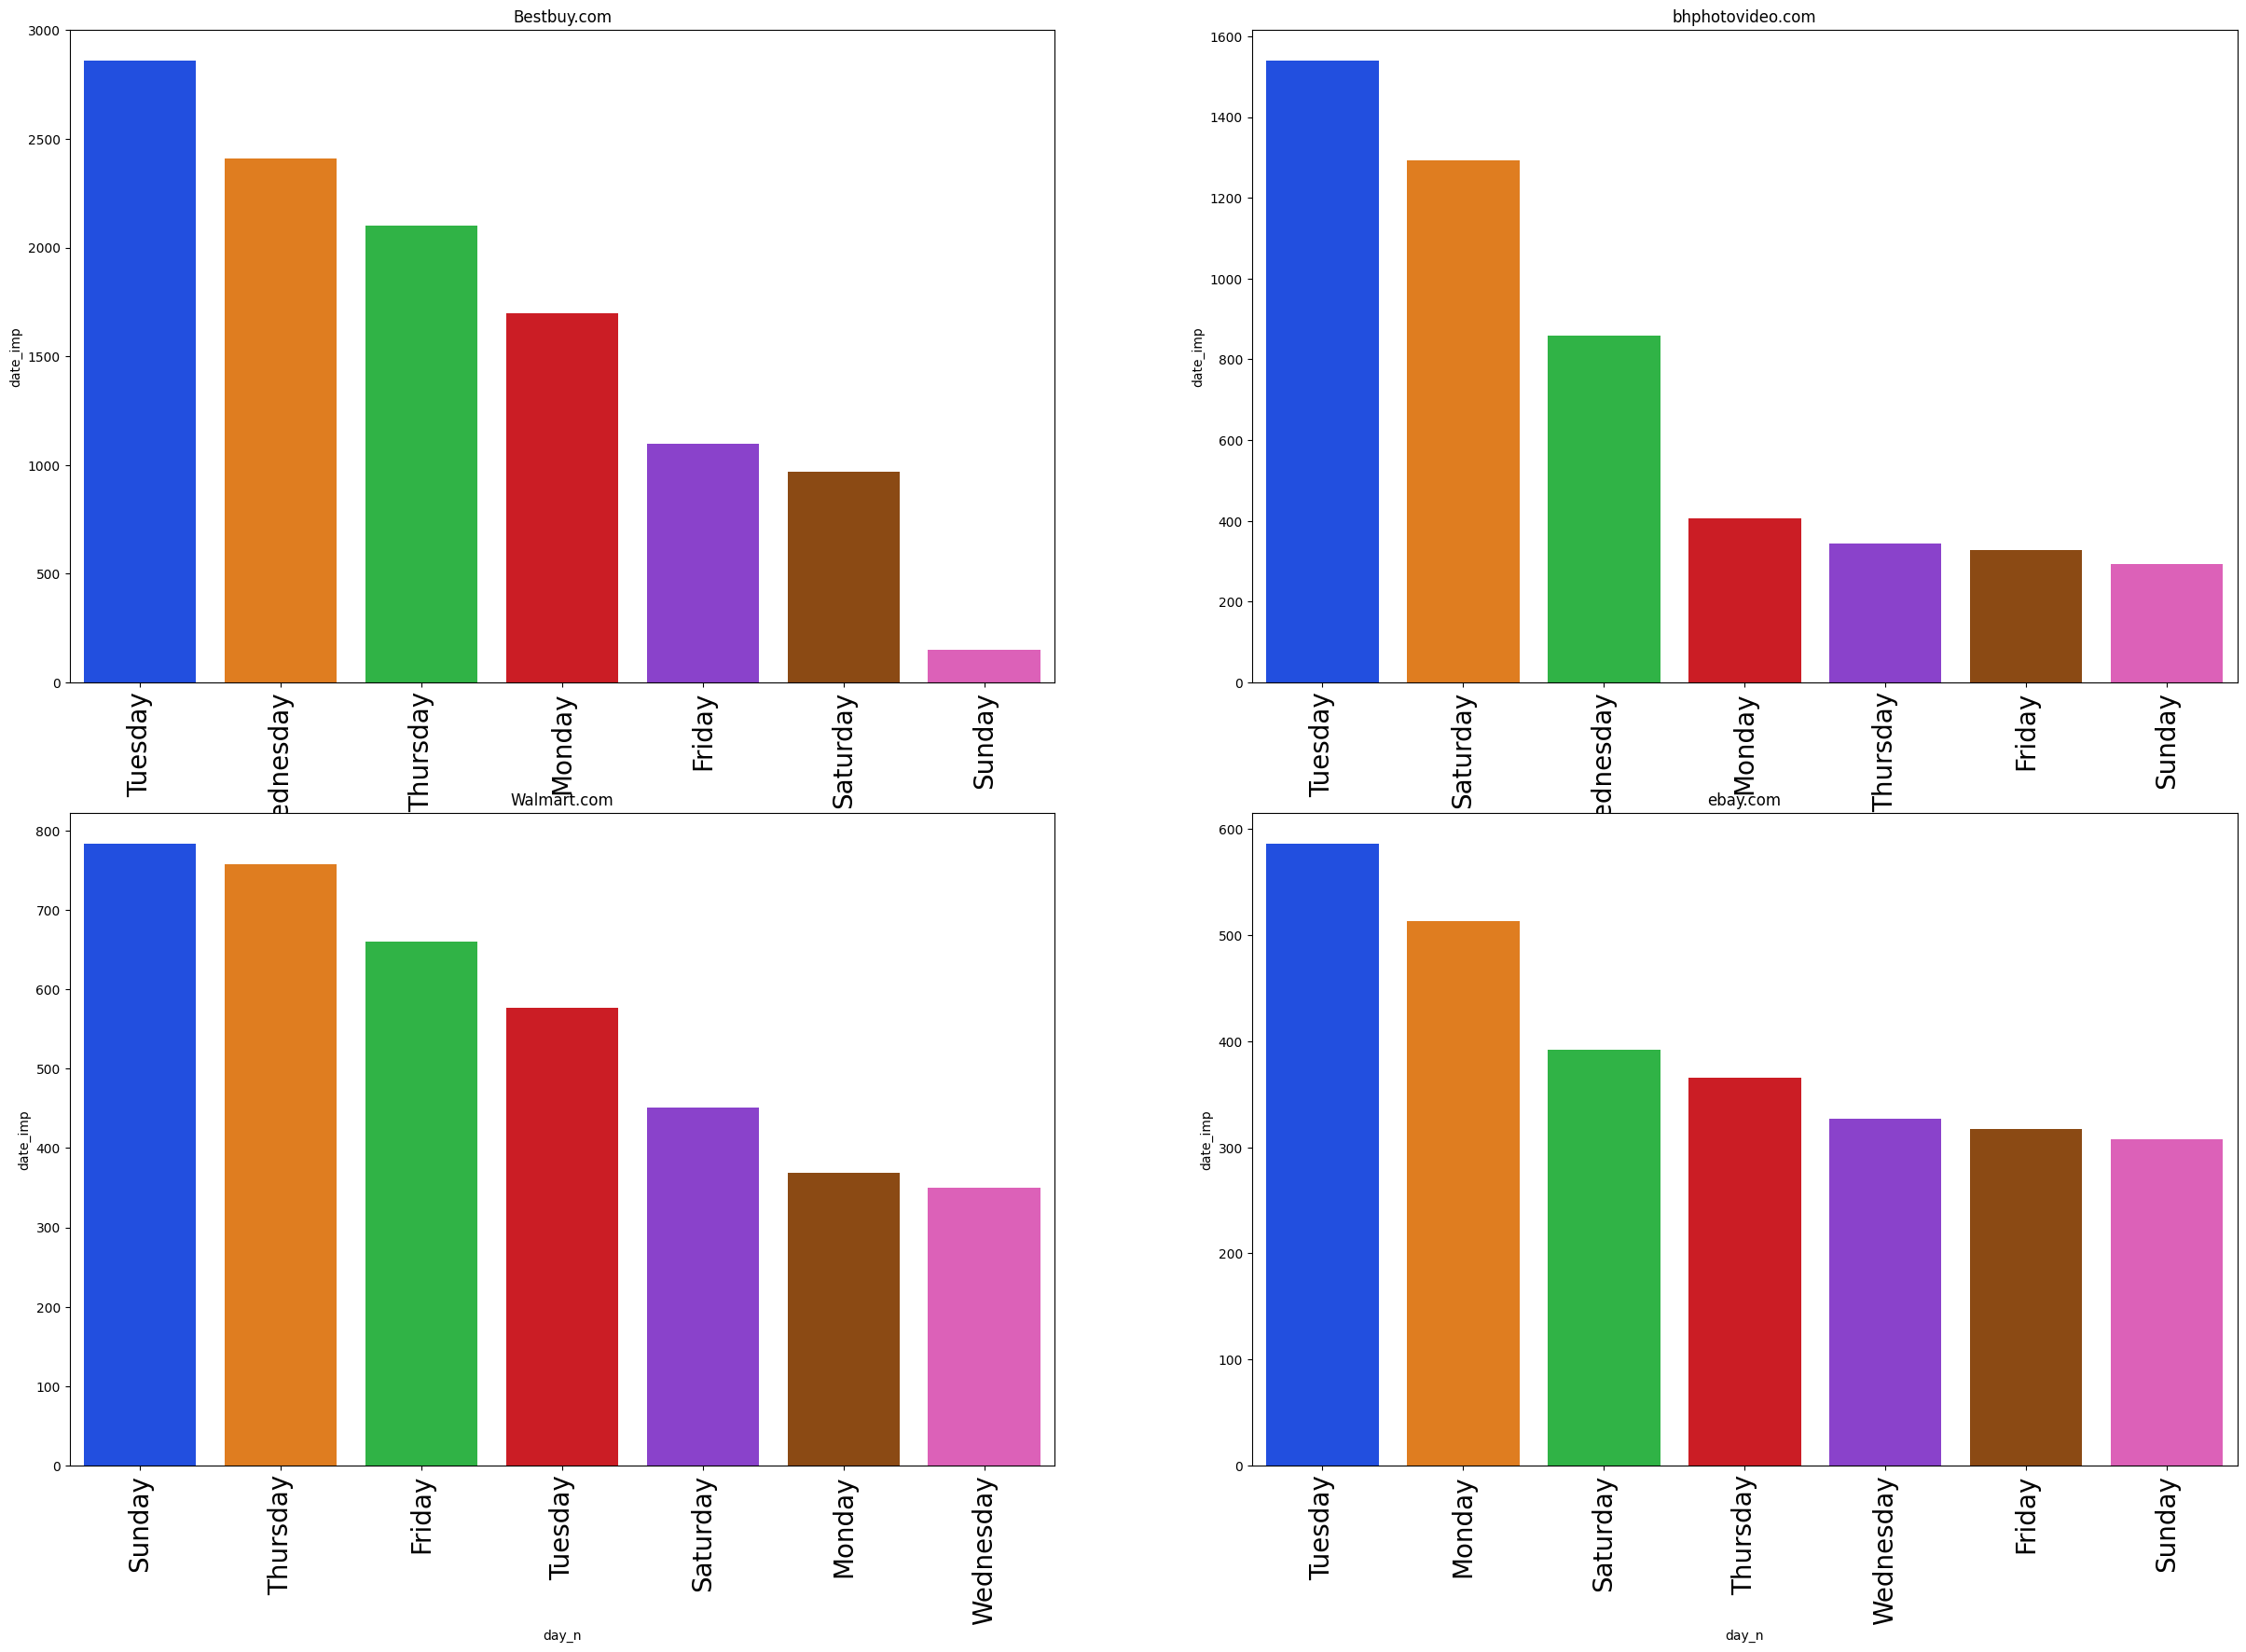

In [22]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
aux14 = df_best[['date_imp','day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='day_n', y='date_imp',data=aux14.head(10),palette='bright');
plt.title('Bestbuy.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,2)
aux15 = df_bhp[['date_imp','day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='day_n', y='date_imp',data=aux15.head(10),palette='bright');
plt.title('bhphotovideo.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,3)
aux16 = df_walmart[['date_imp','day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='day_n', y='date_imp',data=aux16.head(10),palette='bright');
plt.title('Walmart.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,4)
aux17 = df_ebay[['date_imp','day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='day_n', y='date_imp',data=aux17.head(10),palette='bright');
plt.title('ebay.com');
plt.xticks(rotation=90,fontsize=20);

## 2.5 Quais os meses que mais vendem?

### 2.5.1 Quais os meses que mais vendem no geral?

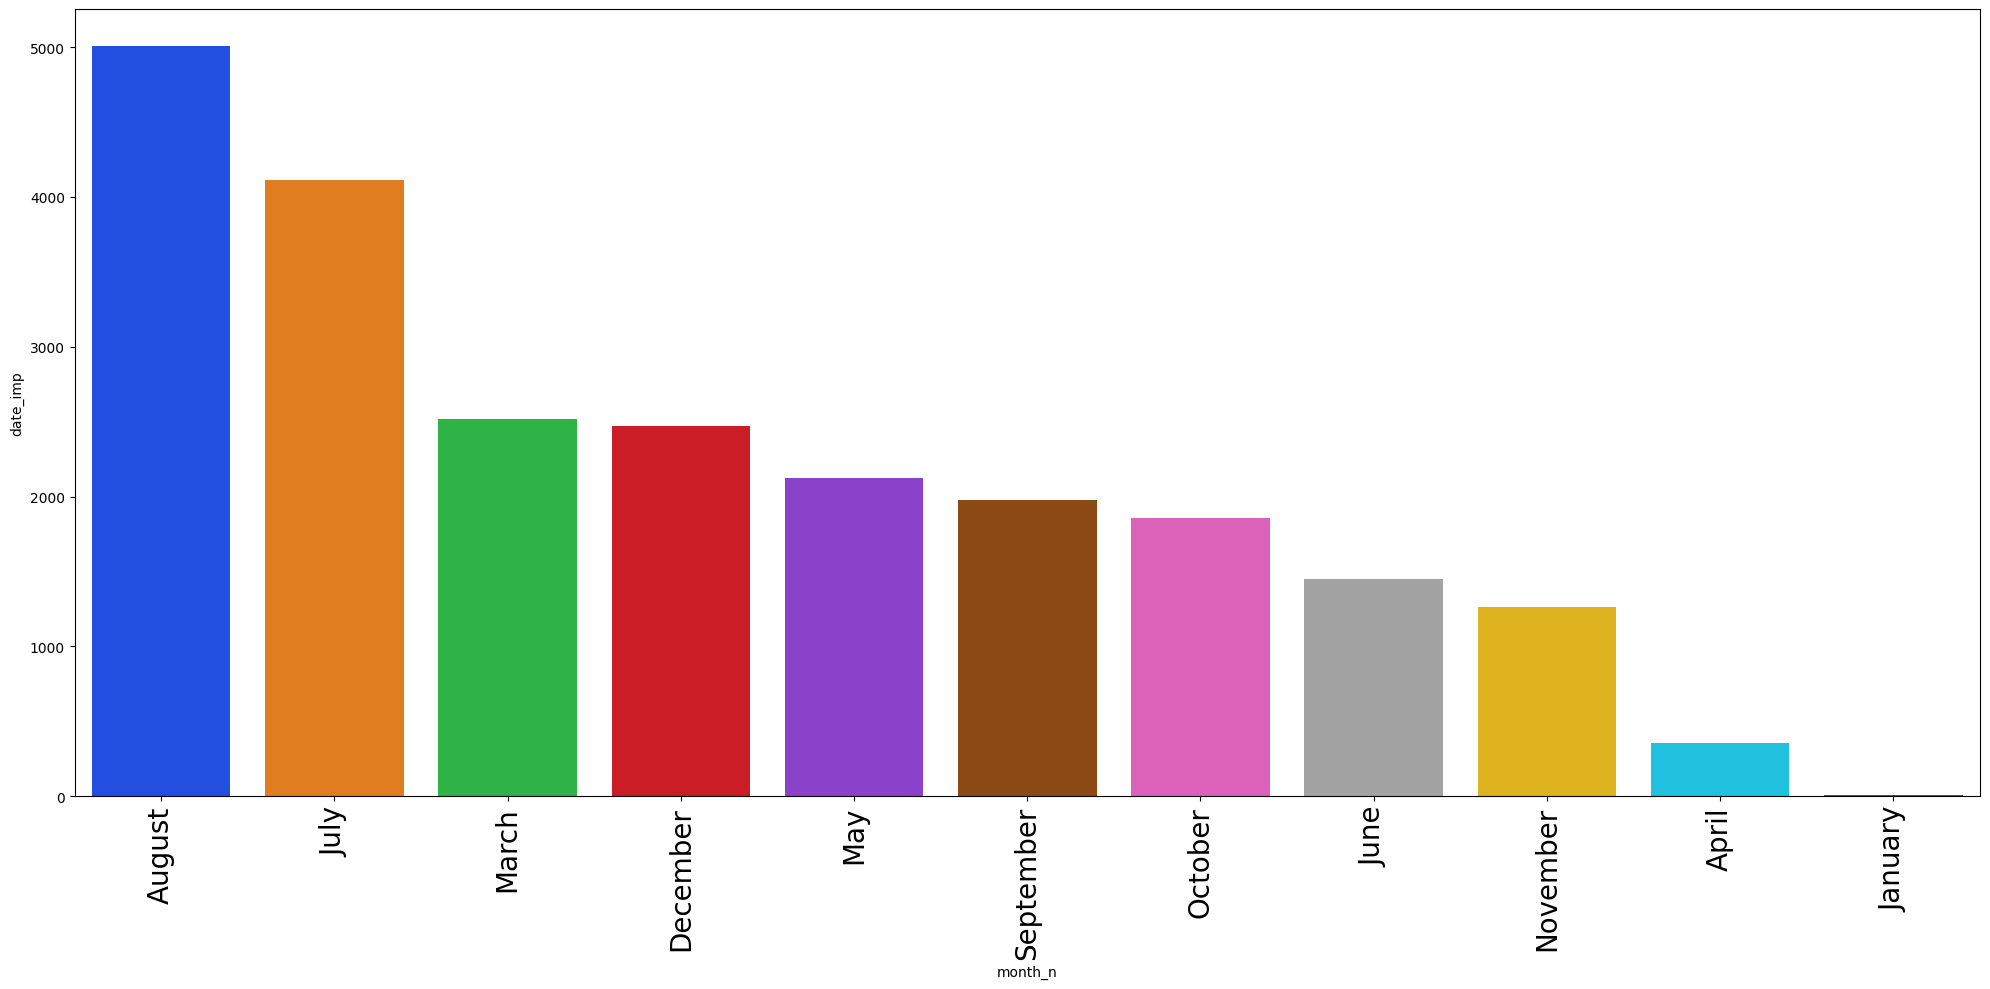

In [23]:
aux18 = df2[['date_imp','month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x='month_n', y='date_imp',data=aux18,palette='bright');
plt.xticks(rotation=90,fontsize=20);

plt.tight_layout();

### 2.5.2 Quais os meses que mais vendem por loja?

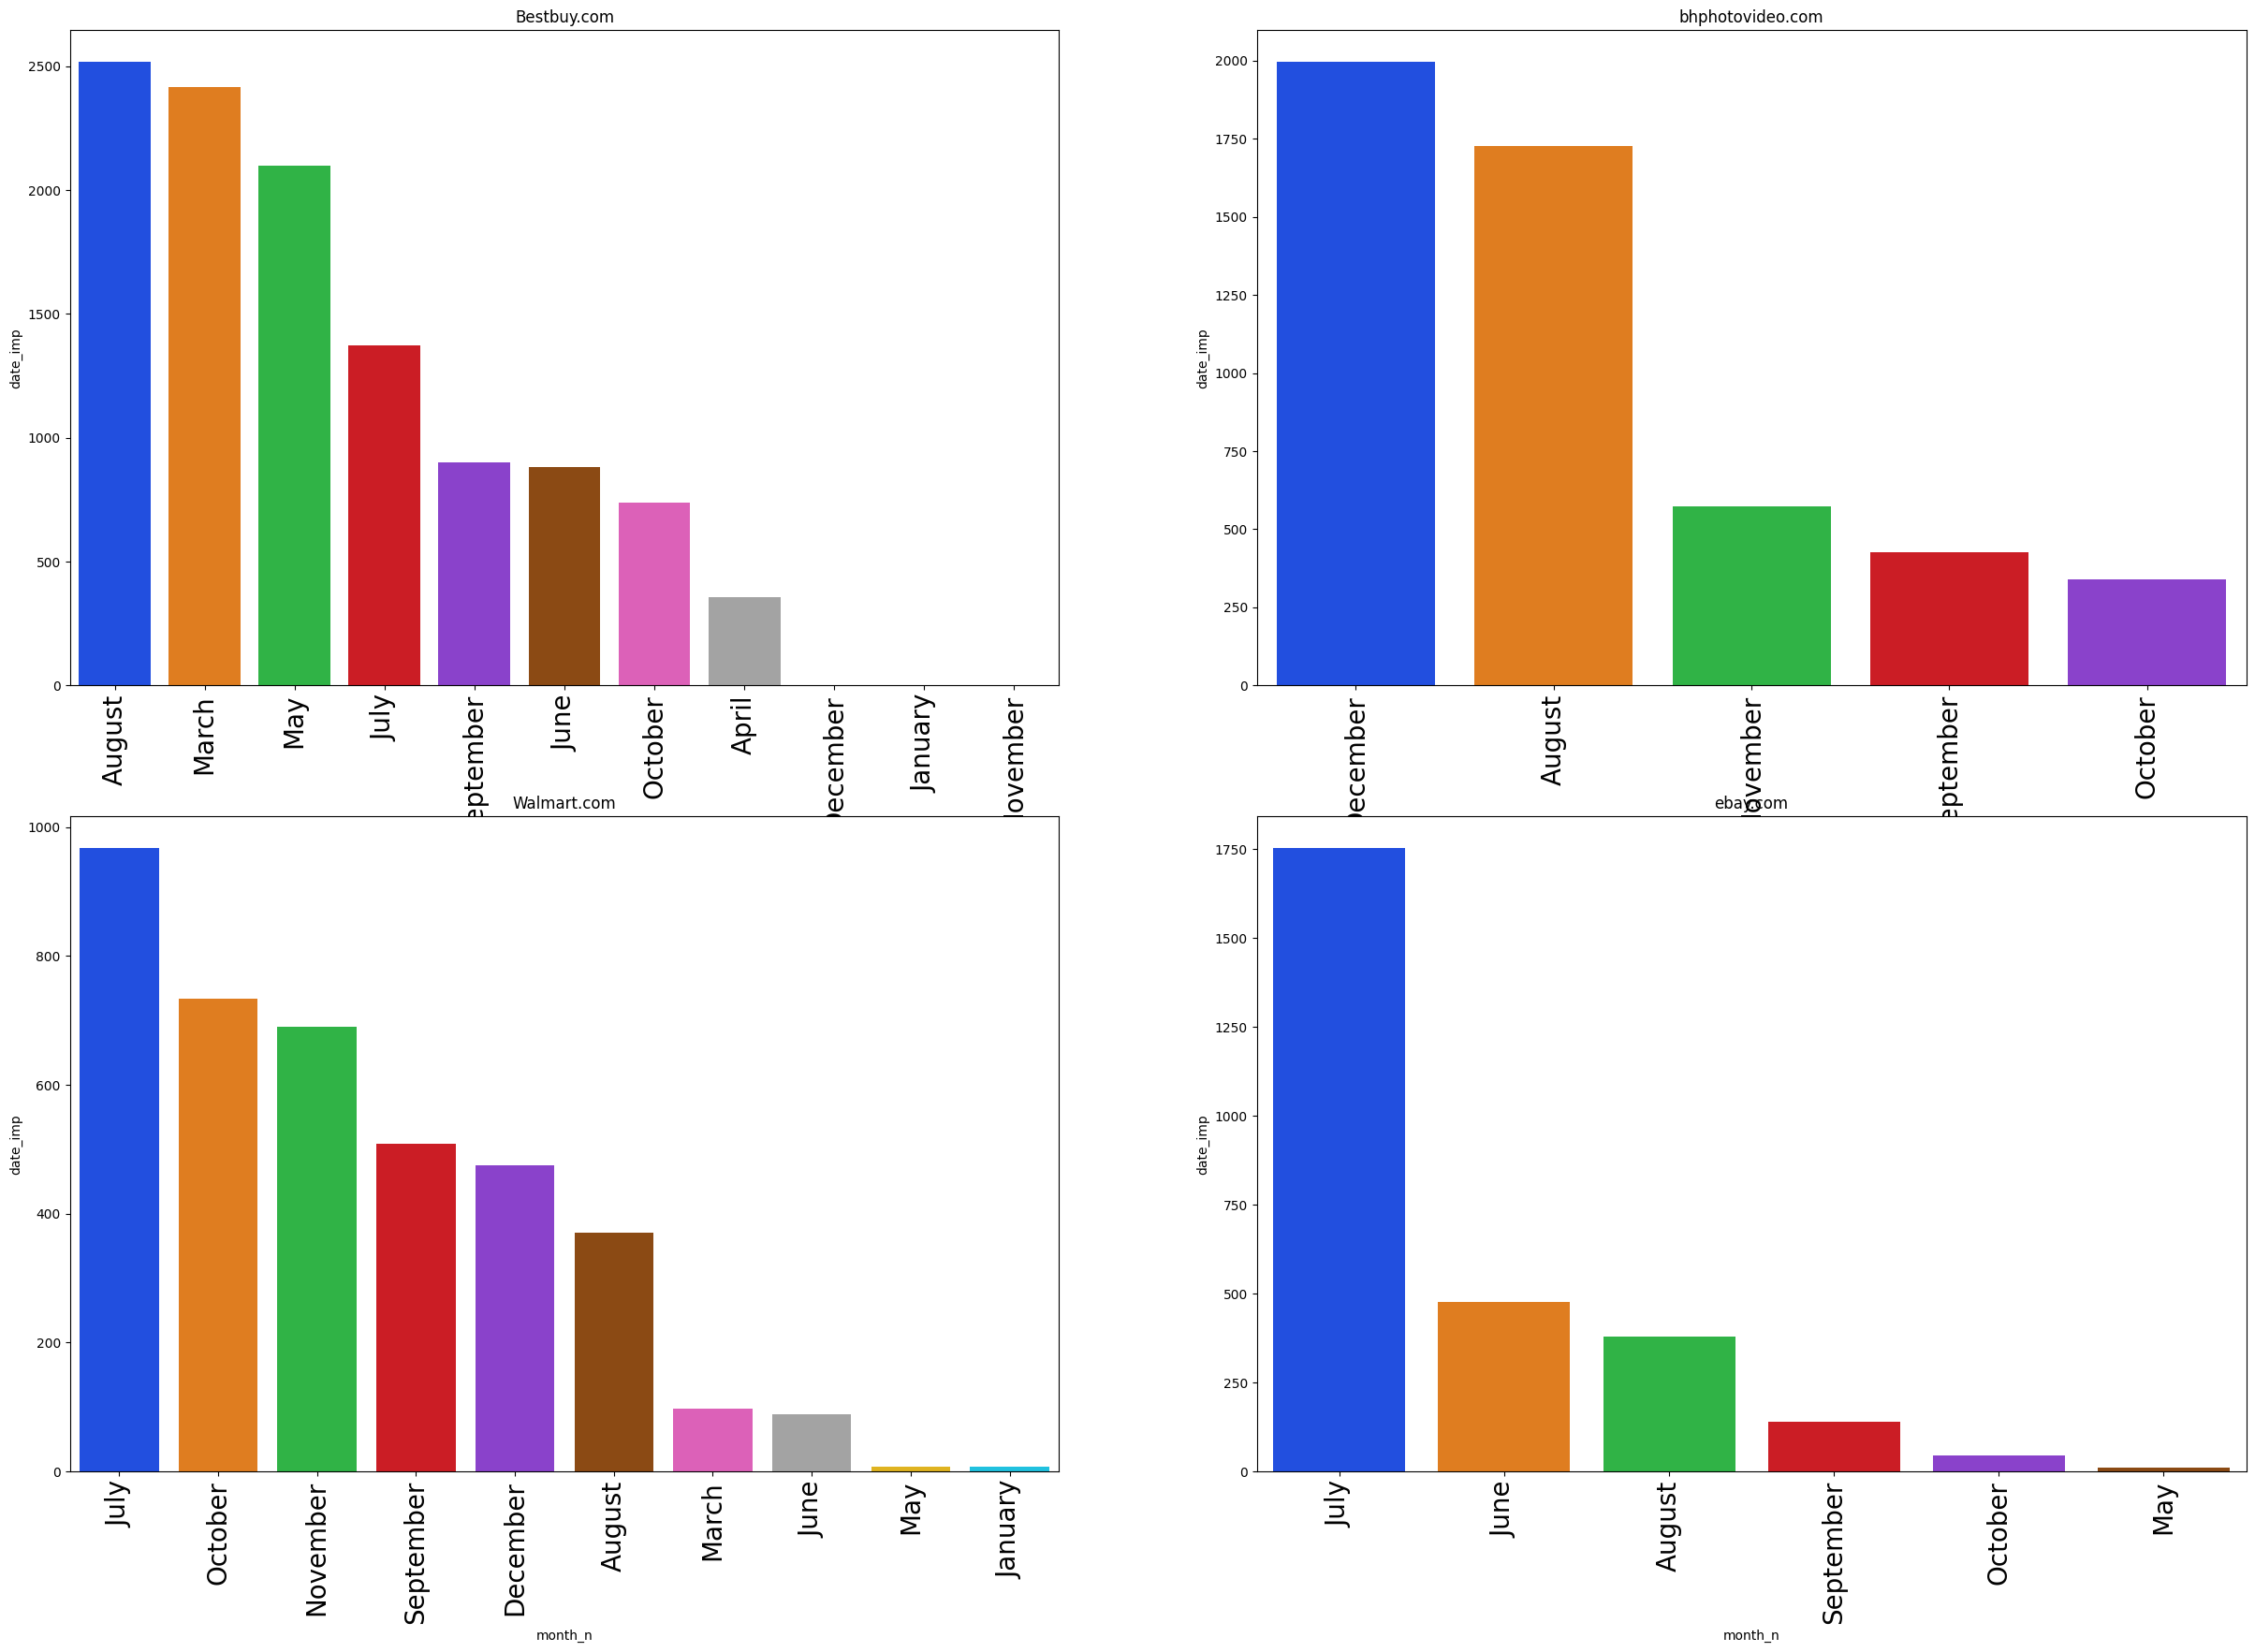

In [24]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
aux19 = df_best[['date_imp','month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='month_n', y='date_imp',data=aux19,palette='bright');
plt.title('Bestbuy.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,2)
aux20 = df_bhp[['date_imp','month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='month_n', y='date_imp',data=aux20,palette='bright');
plt.title('bhphotovideo.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,3)
aux21 = df_walmart[['date_imp','month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='month_n', y='date_imp',data=aux21,palette='bright');
plt.title('Walmart.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,4)
aux22 = df_ebay[['date_imp','month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='month_n', y='date_imp',data=aux22,palette='bright');
plt.title('ebay.com');
plt.xticks(rotation=90,fontsize=20);

## 2.6 Quais as semanas que mais vendem?

### 2.6.1 Quais as semanas que mais vendem no geral?

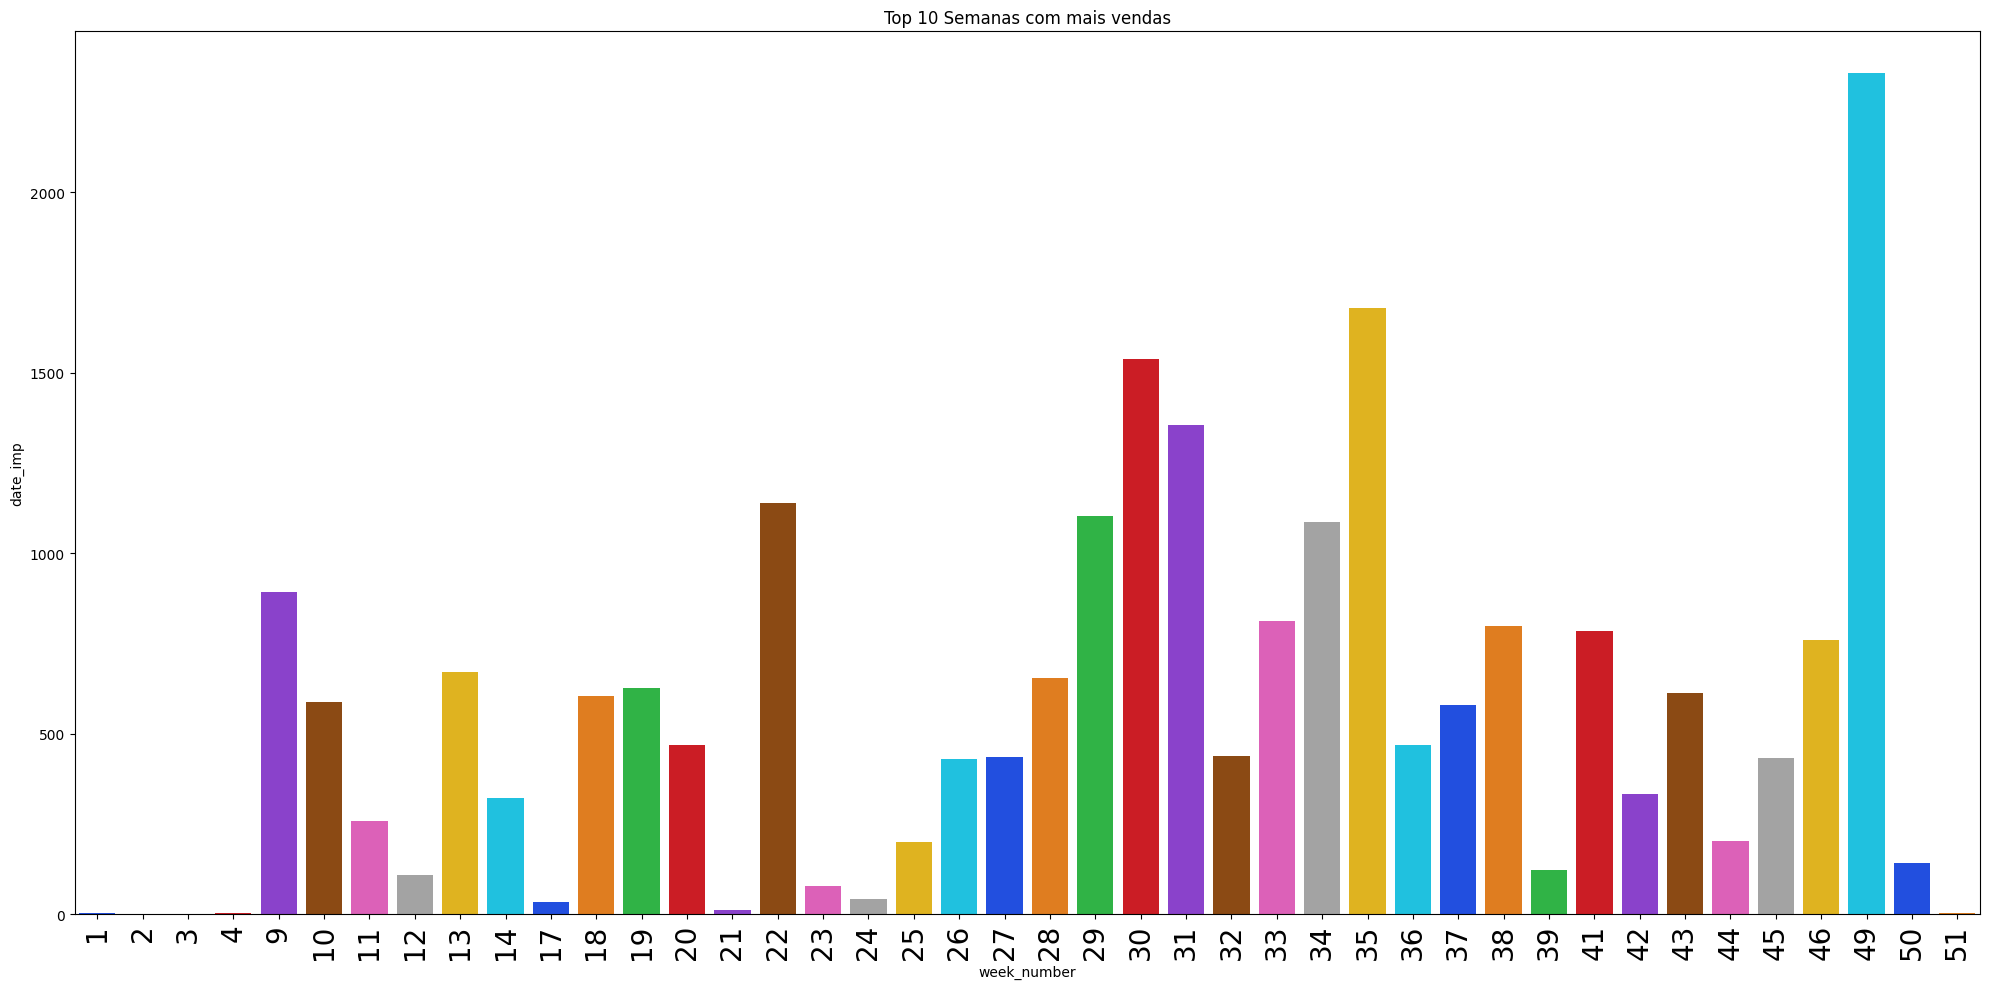

In [25]:
aux23 = df2[['date_imp','week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp',ascending=False)
plt.figure(figsize=(20,10))
plt.title('Top 10 Semanas com mais vendas');
sns.barplot(x='week_number', y='date_imp',data=aux23,palette='bright');
plt.xticks(rotation=90,fontsize=20);

plt.tight_layout();

### 2.6.2 Quais as semanas que mais vendem por loja?

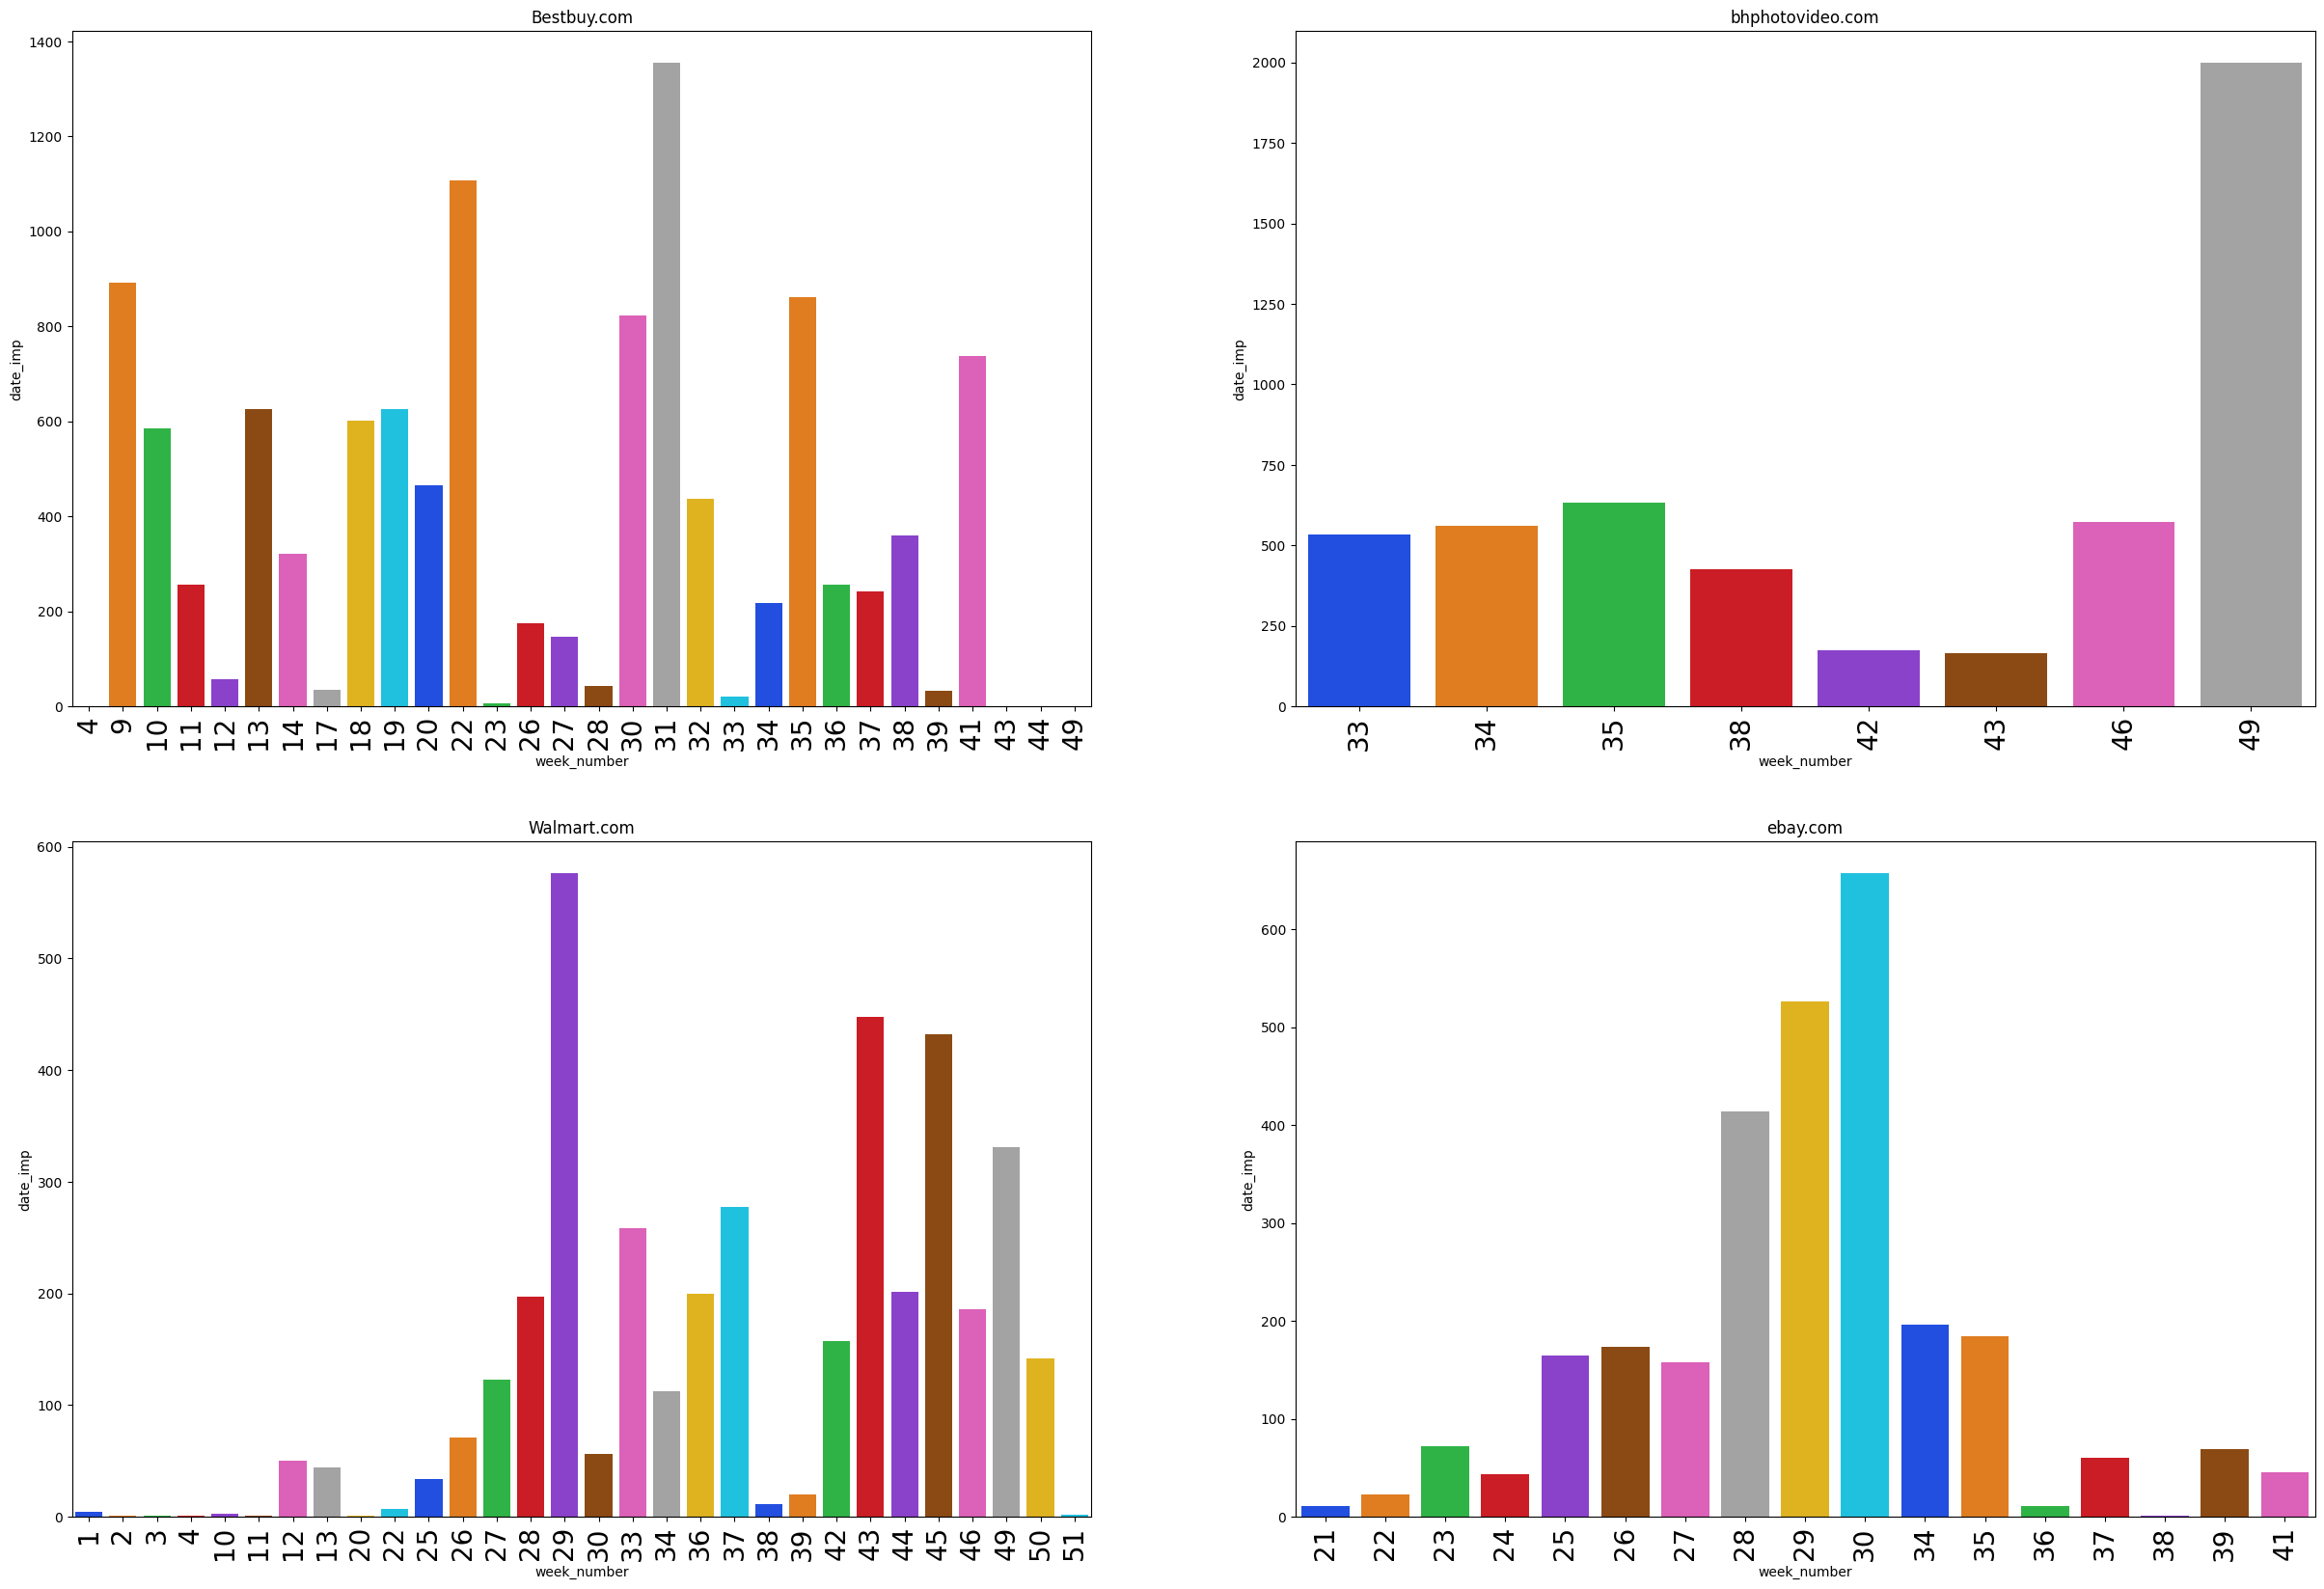

In [26]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
aux24 = df_best[['date_imp','week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='week_number', y='date_imp',data=aux24,palette='bright');
plt.title('Bestbuy.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,2)
aux25 = df_bhp[['date_imp','week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='week_number', y='date_imp',data=aux25,palette='bright');
plt.title('bhphotovideo.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,3)
aux26 = df_walmart[['date_imp','week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='week_number', y='date_imp',data=aux26,palette='bright');
plt.title('Walmart.com');
plt.xticks(rotation=90,fontsize=20);

plt.subplot(2,2,4)
aux27 = df_ebay[['date_imp','week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp',ascending=False)
sns.barplot(x='week_number', y='date_imp',data=aux27,palette='bright');
plt.title('ebay.com');
plt.xticks(rotation=90,fontsize=20);

# 3.0 Feature Engenireeng

In [27]:
df3 = df2.copy()

## 3.1 Categoria mais vendida da Bestbuy.com

In [30]:
df_laptop = df_best.loc[df_best['category_name'] == 'laptop, computer',:]

In [31]:
#Check NA
df_laptop.isna().sum()

date_imp             0
category_name        0
name                 0
price                0
disc_price           0
merchant             0
disc_percentage      0
is_sale              0
imp_count            0
brand                0
p_description        0
date_added           0
date_seen            0
date_updated         0
manufacturer       627
day_n                0
month                0
month_n              0
day                  0
week_number          0
dtype: int64

In [32]:
#Usou o disc_price pois foi o preço vendido na realidade, e faz-e a média do período
#No dataset, cada venda é uma linha, por isso conta-se o data_imp
test = df_laptop.groupby(['name','week_number']).agg({'disc_price':'mean','date_imp':'count'}).reset_index()
test.head()

#Precisamos então da média dos preços do período, podendo ser dia, semana ou mês e a quantidade do item vendido nesse período

,name,week_number,disc_price,date_imp
0,"12 MacBook (Mid 2017, Gold)",30,1599.99,1
1,"12 MacBook (Mid 2017, Gold)",31,1551.99,8
2,"12 MacBook (Mid 2017, Gold)",33,1454.99,2
3,"12 MacBook (Mid 2017, Gold)",34,1551.99,2
4,"12 MacBook (Mid 2017, Gold)",35,1474.49,4


In [94]:
#Criando o dataframe dos valores
x_mean_price = test.pivot(index='week_number',columns='name',values='disc_price')
x_mean_price.head(4)

name,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""",...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
week_number,,,,,,,,,,,,,,,,,,,,,
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,426.495,NaN,2799.99,2599.99,NaN,899.99,236.495,1599.99,...,799.99,499.99,NaN,664.99,379.99,316.99,NaN,807.49,NaN,617.49
10,NaN,NaN,426.495,NaN,2799.99,2599.99,NaN,899.99,238.995,1899.99,...,819.99,429.99,229.99,664.99,474.99,335.99,NaN,949.99,NaN,617.49
11,NaN,NaN,NaN,NaN,2715.99,2482.99,NaN,NaN,NaN,1899.99,...,819.99,NaN,218.49,NaN,474.99,383.99,NaN,NaN,NaN,569.99


In [95]:
#Criando o dataframe dos valores
y_demanda = test.pivot(index='week_number',columns='name',values='date_imp')
y_demanda.head(4)

name,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""",...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
week_number,,,,,,,,,,,,,,,,,,,,,
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,4.0,NaN,3.0,6.0,NaN,2.0,4.0,1.0,...,1.0,2.0,NaN,4.0,4.0,4.0,NaN,4.0,NaN,2.0
10,NaN,NaN,2.0,NaN,1.0,4.0,NaN,1.0,2.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0
11,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,1.0,...,1.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,2.0


# 4.0 Descrição dos dados (Dataframe Pivotado)

## 4.1 Data Dimension

In [96]:
print(f'Number of rows x: {x_mean_price.shape[0]}')
print(f'Number of columns x: {x_mean_price.shape[1]}')

Number of rows x: 26
Number of columns x: 39


In [97]:
print(f'Number of rows y: {y_demanda.shape[0]}')
print(f'Number of columns y: {y_demanda.shape[1]}')

Number of rows y: 26
Number of columns y: 39


## 4.2 Data Dtypes

In [98]:
x_mean_price.dtypes #todos são float

name
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            float64
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          float64
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           float64
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                                    float64
15.4 MacBook Pro with Touch Bar (Late 2016, Silver)                                                                                                                    

In [99]:
y_demanda.dtypes #todos são float

name
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            float64
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          float64
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           float64
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                                    float64
15.4 MacBook Pro with Touch Bar (Late 2016, Silver)                                                                                                                    

## 4.3 Check NA

In [100]:
x_mean_price.isna().sum()

name
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                                    21
15.4 MacBook Pro with Touch Bar (Late 2016, Silver)                                                                                                                                        

In [101]:
y_demanda.isna().sum() #Os NA são iguais nos dois, pois são as semanas que não tem vendas de determinado produto

name
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                                    21
15.4 MacBook Pro with Touch Bar (Late 2016, Silver)                                                                                                                                        

## 4.4 Replace NA - Substituindo pela Mediana

In [102]:
mediana_x = np.round(x_mean_price.median(),2) #O preço existia, mas não vendi
x_mean_price.fillna(mediana_x,inplace=True)
x_mean_price.head()

name,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""",...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
week_number,,,,,,,,,,,,,,,,,,,,,
4,1551.99,1299.99,415.500,949.99,2618.99,2353.99,304.99,829.99,249.000,1899.99,...,819.99,463.74,218.49,601.49,415.99,337.49,2399.99,853.74,4179.99,610.99
9,1551.99,1299.99,426.495,949.99,2799.99,2599.99,304.99,899.99,236.495,1599.99,...,799.99,499.99,218.49,664.99,379.99,316.99,2399.99,807.49,4179.99,617.49
10,1551.99,1299.99,426.495,949.99,2799.99,2599.99,304.99,899.99,238.995,1899.99,...,819.99,429.99,229.99,664.99,474.99,335.99,2399.99,949.99,4179.99,617.49
11,1551.99,1299.99,415.500,949.99,2715.99,2482.99,304.99,829.99,249.000,1899.99,...,819.99,463.74,218.49,601.49,474.99,383.99,2399.99,853.74,4179.99,569.99
13,1551.99,1299.99,449.000,949.99,2547.99,2353.99,304.99,849.99,223.995,1899.99,...,819.99,499.99,203.49,636.99,444.99,369.99,2399.99,909.99,4179.99,591.49


In [103]:
#A venda é NA pois não vendeu, então colocamos 0 no lugar do NA.
y_demanda.fillna(0,inplace=True)
y_demanda.head()

name,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""",...,"HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
week_number,,,,,,,,,,,,,,,,,,,,,
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,4.0,0.0,3.0,6.0,0.0,2.0,4.0,1.0,...,1.0,2.0,0.0,4.0,4.0,4.0,0.0,4.0,0.0,2.0
10,0.0,0.0,2.0,0.0,1.0,4.0,0.0,1.0,2.0,1.0,...,1.0,1.0,1.0,2.0,2.0,2.0,0.0,2.0,0.0,2.0
11,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0
13,0.0,0.0,1.0,0.0,2.0,8.0,0.0,1.0,2.0,1.0,...,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0


# 4.5 Desccriptive Statistics

In [104]:
#central tendency
x_ct1 = pd.DataFrame(x_mean_price.apply(np.mean)).T #média
x_ct2 = pd.DataFrame(x_mean_price.apply(np.median)).T #mediana

#dispersion
x_d1 = pd.DataFrame(x_mean_price.apply(np.std)).T #desvio padrão
x_d2 = pd.DataFrame(x_mean_price.apply(np.min)).T #min
x_d3 = pd.DataFrame(x_mean_price.apply(np.max)).T #max
x_d4 = pd.DataFrame(x_mean_price.apply(lambda x: x.max() - x.min())).T #range
x_d5 = pd.DataFrame(x_mean_price.apply(lambda x: x.skew())).T #skew
x_d6 = pd.DataFrame(x_mean_price.apply(lambda x: x.kurtosis())).T #kurtosis

m2 = pd.concat([x_d2,x_d3,x_d4,x_ct1,x_ct2,x_d1,x_d5,x_d6]).T.reset_index()
m2.columns = ['att','min','max','range','mean','median','std','skew','kurtosis']
m2

,att,min,max,range,mean,median,std,skew,kurtosis
0,"12 MacBook (Mid 2017, Gold)",1454.990,1599.99,145.000,1547.124615,1551.99,25.648346,-2.457686,8.310054
1,"12 MacBook (Mid 2017, Silver)",1234.990,1299.99,65.000,1295.990000,1299.99,14.317821,-3.735032,13.784949
2,12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,372.995,449.00,76.005,413.189808,415.50,15.423120,-1.054924,2.830858
3,"13.3 MacBook Air (Mid 2017, Silver)",911.990,969.99,58.000,949.297692,949.99,8.393080,-2.975611,16.702015
4,"15.4 MacBook Pro with Touch Bar (Late 2016, Si...",2327.990,2799.99,472.000,2607.393846,2618.99,112.833610,-1.131897,2.049122
5,"15.4 MacBook Pro with Touch Bar (Late 2016, Sp...",2023.990,2599.99,576.000,2346.913077,2353.99,122.523757,-0.274833,1.347179
6,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,237.490,313.49,76.000,299.720769,304.99,16.347918,-2.916993,8.218479
7,Acer - 2-in-1 15.6 Refurbished Touch-Screen La...,764.990,899.99,135.000,834.028462,829.99,27.804926,0.937281,2.943939
8,Acer 15.6 Chromebook CB5-571-C4G4,199.990,249.00,49.010,242.479231,249.00,14.017001,-2.306458,4.514429
9,Alienware - R3 17.3 Laptop - Intel Core i7 - 1...,1599.990,1899.99,300.000,1879.643846,1899.99,71.165540,-3.486137,11.301211


In [105]:
#central tendency
y_ct1 = pd.DataFrame(y_demanda.apply(np.mean)).T #média
y_ct2 = pd.DataFrame(y_demanda.apply(np.median)).T #mediana

#dispersion
y_d1 = pd.DataFrame(y_demanda.apply(np.std)).T #desvio padrão
y_d2 = pd.DataFrame(y_demanda.apply(np.min)).T #min
y_d3 = pd.DataFrame(y_demanda.apply(np.max)).T #max
y_d4 = pd.DataFrame(y_demanda.apply(lambda x: x.max() - x.min())).T #range
y_d5 = pd.DataFrame(y_demanda.apply(lambda x: x.skew())).T #skew
y_d6 = pd.DataFrame(y_demanda.apply(lambda x: x.kurtosis())).T #kurtosis

m3 = pd.concat([y_d2,y_d3,y_d4,y_ct1,y_ct2,y_d1,y_d5,y_d6]).T.reset_index()
m3.columns = ['att','min','max','range','mean','median','std','skew','kurtosis']
m3

,att,min,max,range,mean,median,std,skew,kurtosis
0,"12 MacBook (Mid 2017, Gold)",0.0,8.0,8.0,0.961538,0.0,1.764626,2.738840,9.024976
1,"12 MacBook (Mid 2017, Silver)",0.0,2.0,2.0,0.384615,0.0,0.624926,1.474017,1.189701
2,12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,0.0,4.0,4.0,1.038462,0.5,1.125945,0.606680,-0.428079
3,"13.3 MacBook Air (Mid 2017, Silver)",0.0,2.0,2.0,0.384615,0.0,0.788227,1.658711,0.807453
4,"15.4 MacBook Pro with Touch Bar (Late 2016, Si...",0.0,6.0,6.0,1.153846,0.0,1.609881,1.437577,1.673167
5,"15.4 MacBook Pro with Touch Bar (Late 2016, Sp...",0.0,12.0,12.0,3.230769,1.0,3.885948,0.951022,-0.225438
6,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,0.0,2.0,2.0,0.538462,0.0,0.887120,1.105353,-0.849951
7,Acer - 2-in-1 15.6 Refurbished Touch-Screen La...,0.0,2.0,2.0,0.384615,0.0,0.624926,1.474017,1.189701
8,Acer 15.6 Chromebook CB5-571-C4G4,0.0,4.0,4.0,0.769231,1.0,0.932643,1.711207,4.066693
9,Alienware - R3 17.3 Laptop - Intel Core i7 - 1...,0.0,2.0,2.0,0.615385,1.0,0.624926,0.534925,-0.518213


# 5.0 EDA - Dataset Pivotado

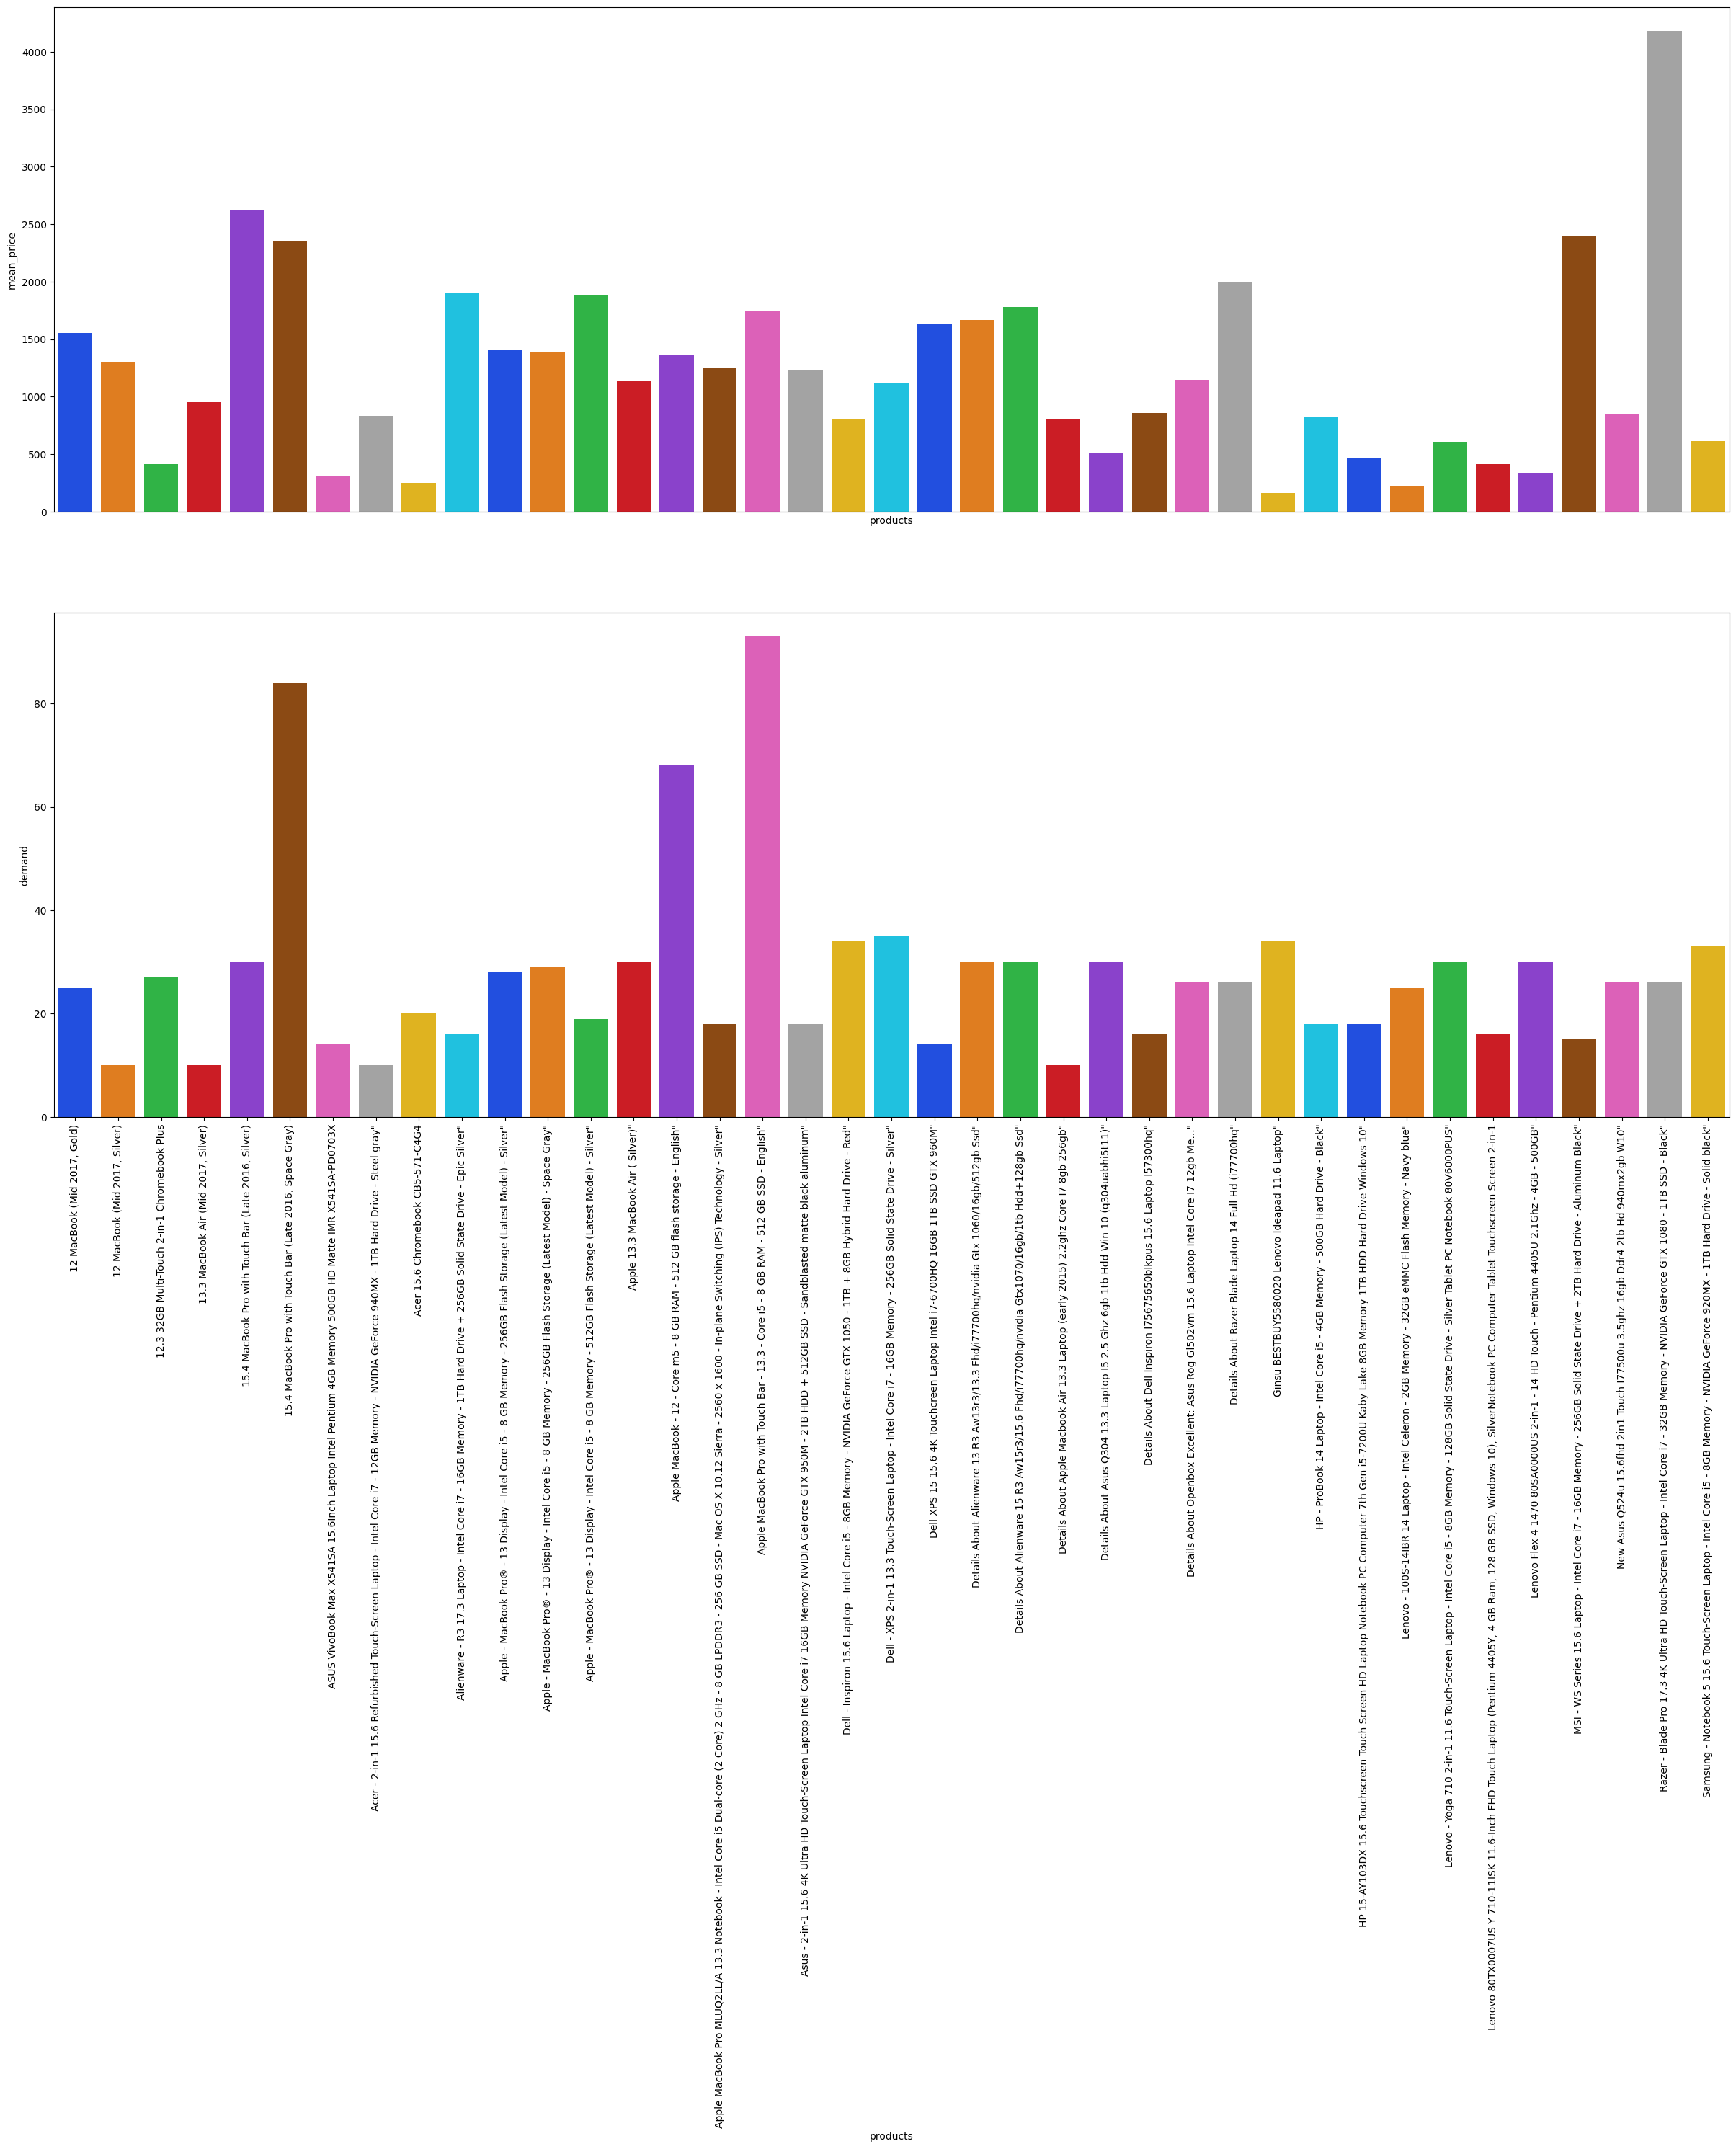

In [106]:
plt.figure(figsize=(30,20));

plt.subplot(2,1,1)
auxx1 = pd.DataFrame(x_mean_price.apply(lambda x: x.median())).reset_index()
auxx1.columns = ['products','mean_price']
sns.barplot(x='products',y='mean_price',data=auxx1,palette='bright');
plt.xticks([]);


plt.subplot(2,1,2)
auxx2 = pd.DataFrame(y_demanda.apply(lambda x: x.sum())).reset_index()
auxx2.columns = ['products','demand']
sns.barplot(x='products',y='demand',data=auxx2,palette='bright');
plt.xticks(rotation=90);

## 5.1 Mudança de preço por semana por produto

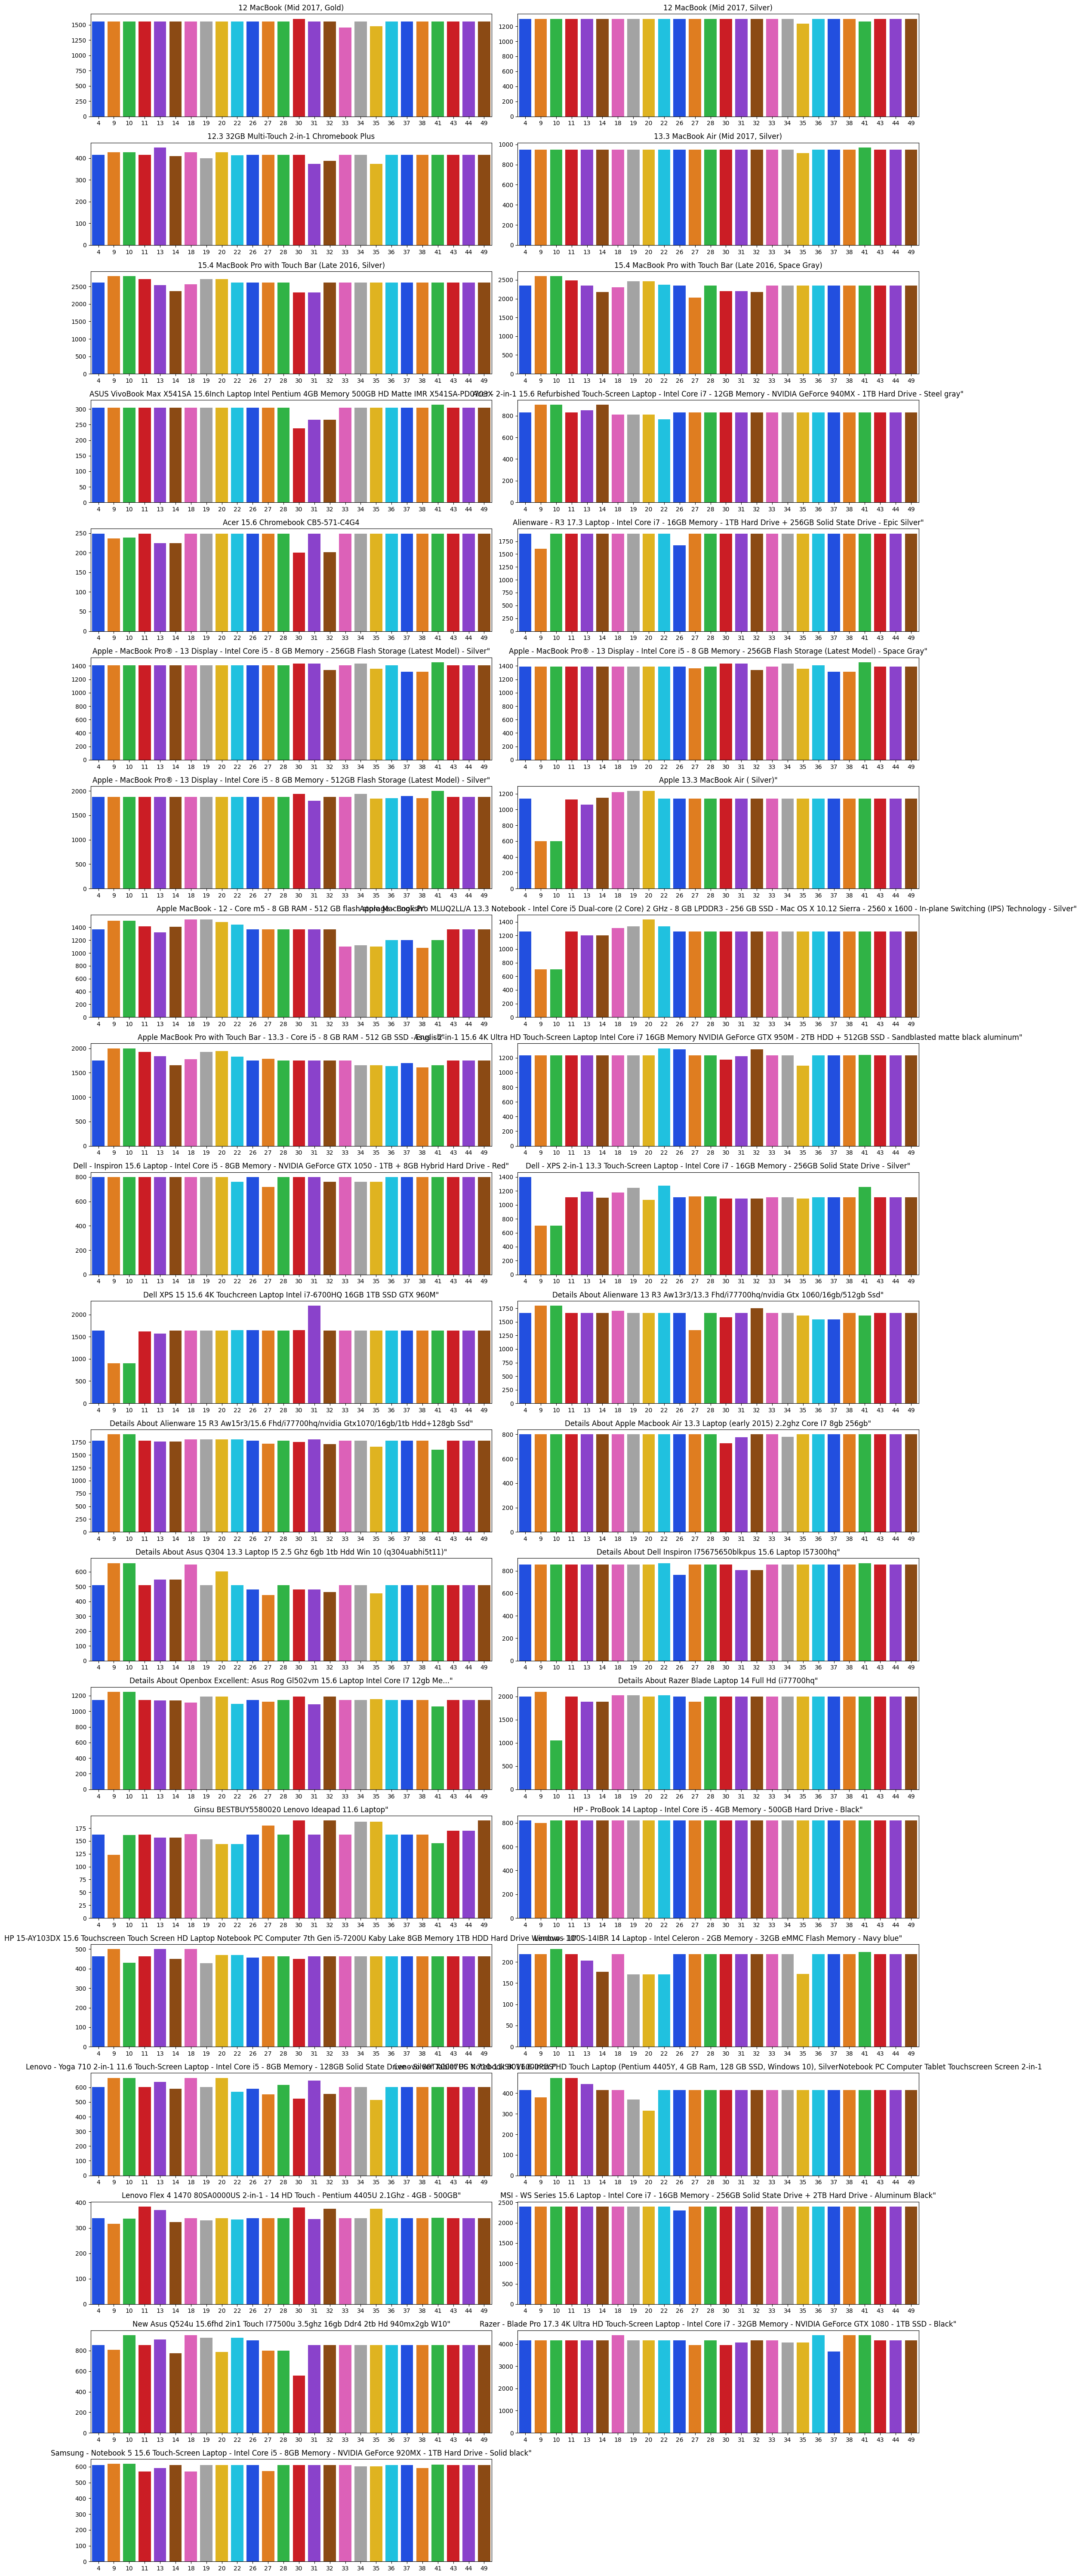

In [117]:
plt.figure(figsize=(20,60));

for k in np.arange(1,len(x_mean_price.columns)+1,1):
  plt.subplot(20,2,k);
  sns.barplot(x=x_mean_price.index.tolist(),y=x_mean_price[x_mean_price.columns[k-1]],data=x_mean_price,palette='bright');
  plt.title(x_mean_price.columns.tolist()[k-1]);
  plt.ylabel('')
  plt.tight_layout()

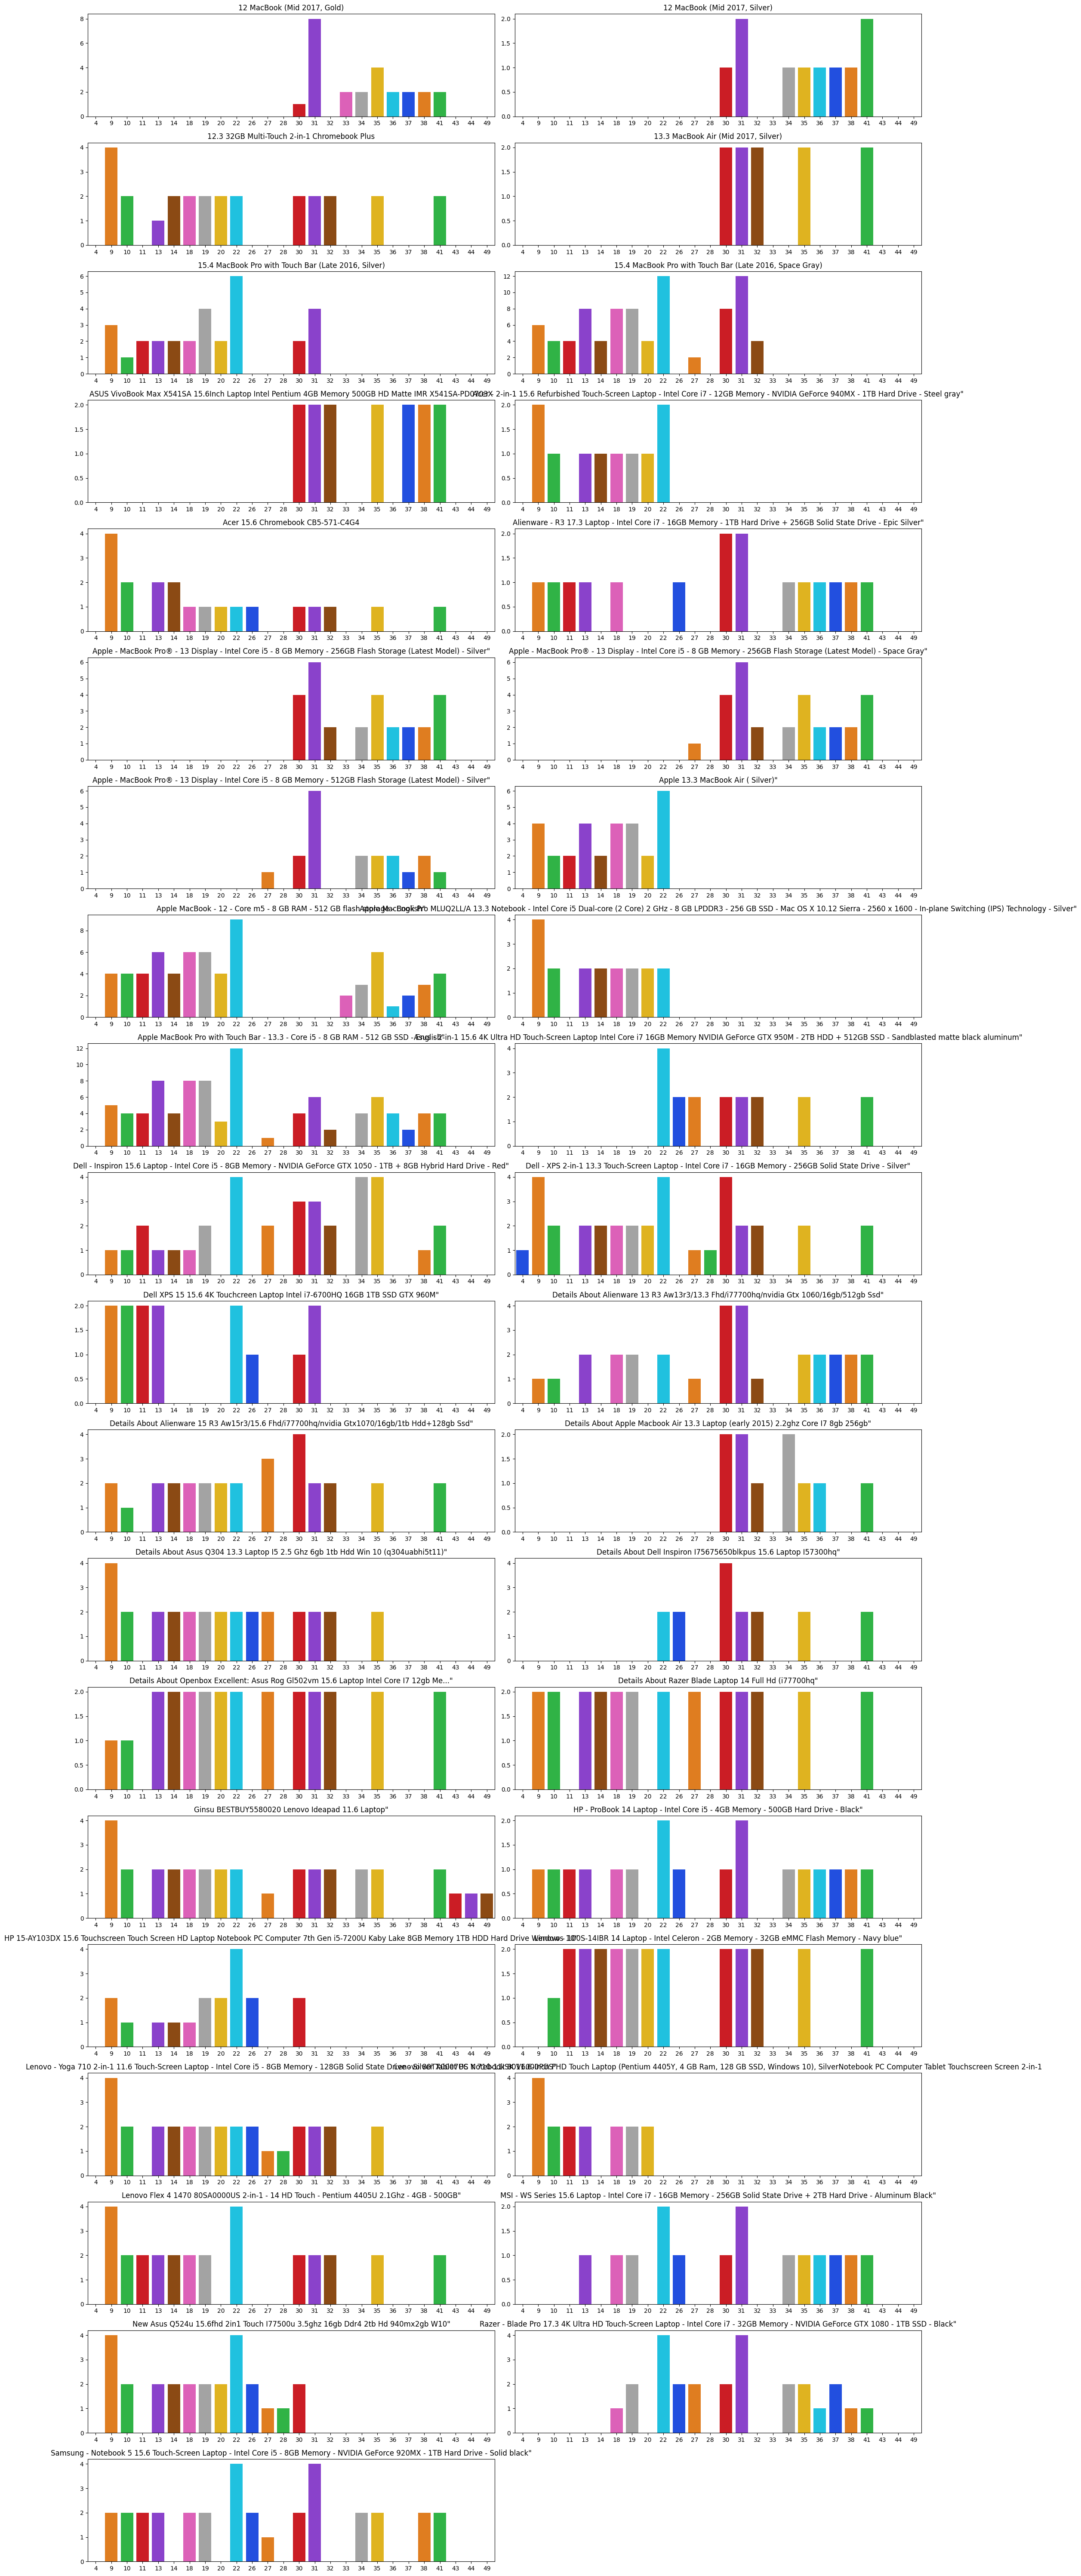

In [118]:
plt.figure(figsize=(20,60));

for k in np.arange(1,len(y_demanda.columns)+1,1):
  plt.subplot(20,2,k);
  sns.barplot(x=y_demanda.index.tolist(),y=y_demanda[y_demanda.columns[k-1]],data=y_demanda,palette='bright');
  plt.title(y_demanda.columns.tolist()[k-1]);
  plt.ylabel('')
  plt.tight_layout()